#  Hotel Data EDA 
## 1. 개요

### 목적
Hotel Booking Demand Datasets를 분석.
### 데이터
2015.07.01~2025.08.31 Resort Hotel과 City Hotel의 예약 데이터

### 주요 분석
0) 데이터 전처리
1) 호텔 타입별 예약 분포.
2) 월별 호텔 예약 분포.
3) 월별 호텔 취소 현황.
4) 월별 호텔 취소율.
5) 월별/호텔별 연령대별 순고객 수 집계.(취소 제외)
6) 연령대별 고객 수 통합 시각화.(라인 차트)
7) 상위 20개 나라 호텔 타입별 순예약수  
8) 상위 20개 나라 히트맵
9) Lead Time 박스 플롯.
10) Lead Time 분포
11) 예약 선행 기간(Lead Time) 구간별 취소율
12) 대륙별 호텔 타입별 예약수
13) 국가별 취소율 
14) 총 숙박 일수별 취소율 

#### 0. 데이터 전처리
1. 데이터 로드.
2. 데이터 결측값 개수 확인.
3. 결측값 처리.
4. 데이터 Type변환

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ================================
# 그래프 설정
# ================================
# 한글 폰트 설정
# (주: Malgun Gothic 폰트가 없는 환경에서는 오류가 발생할 수 있습니다.
#  이 경우 다른 폰트(예: NanumGothic)로 변경해야 합니다.)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.style.use('fivethirtyeight')  # 그래프 스타일 설정

# ================================
# 데이터 로드
# ================================
# 'data' 폴더가 노트북 파일과 같은 위치에 있다고 가정하고 상대 경로를 사용합니다.
data_path = os.path.join('data', 'hotel_data_modified.csv')
print(f"데이터 로드 시도 경로: {os.path.abspath(data_path)}")

try:
    # CSV 파일을 DataFrame으로 읽어오기
    hotel_data = pd.read_csv(data_path)
    print("데이터 로드 성공.")
except FileNotFoundError:
    print("\n[오류 메시지] ========================================================")
    print(f"!!! 'FileNotFoundError': 파일을 찾을 수 없습니다. 경로: {data_path}")
    print("!!! 'data' 폴더가 현재 노트북 파일이 있는 디렉토리에 있는지 확인하거나,")
    print("!!! 'data_path' 변수에 정확한 파일 경로를 직접 지정해 주세요.")
    print("====================================================================")
    # 데이터 로드 실패 시 나머지 코드 실행을 중단합니다.
    raise

# ================================
# 데이터 기본 정보 확인
# ================================
# 데이터의 첫 5행 출력 (데이터 구조 파악)
print("\n=== 데이터 첫 5행 ===")
print(hotel_data.head())

# 데이터의 크기 (행, 열 개수) 확인
print("\n=== 데이터 크기 (행, 열) ===")
print(hotel_data.shape)

# 수치형 데이터의 기본 통계 정보 (평균, 표준편차, 최솟값, 최댓값 등)
print("\n=== 수치형 데이터 기본 통계 ===")
print(hotel_data.describe())

# 데이터 타입, 메모리 사용량, null 값 개수 등 상세 정보
print("\n=== 데이터 상세 정보 ===")
print(hotel_data.info())

# 각 컬럼별 결측값(null) 개수 확인
print("\n=== 컬럼별 결측값 개수 ===")
print(hotel_data.isnull().sum())

# ================================
# 결측값 삭제 (company 너무 많은 null)
# ================================
# 'company' 컬럼 삭제 : 너무 많은 결측으로 무의미한 데이터
hotel_data.drop("company", inplace=True, axis=1)
print("\n=== 'company' 컬럼 삭제 후 데이터 크기 ===")
print(hotel_data.shape)

# ================================
# 중앙값 대체
# ================================
def impute_median(series):
    # NaN 값이 있는 경우에만 중앙값으로 대체
    return series.fillna(series.median())

# 'children' 컬럼의 결측값을 중앙값으로 대체
hotel_data.children = hotel_data["children"].transform(impute_median)

# 'agent' 컬럼의 결측값을 중앙값으로 대체
hotel_data.agent = hotel_data["agent"].transform(impute_median)

# ================================
# 최빈값 대체
# ================================
# 'country' 컬럼의 결측값을 최빈값으로 대체
# mode().values[0]: 최빈값을 numpy 배열 형태로 가져온 후 첫 번째 값 선택
hotel_data["country"].fillna(hotel_data["country"].mode().values[0], inplace=True)

# ================================
# 컬럼 확인.
# ================================
# 최종 결측값 처리 후 각 컬럼별 결측값 개수 최종 확인
print("\n=== 최종 결측값 처리 후 각 컬럼별 결측값 개수 ===")
print(hotel_data.isnull().sum())

# ================================
# 데이터 타입 변환
# ================================
# 'arrival_date_year' 컬럼을 정수형에서 문자열형으로 변환
# apply(lambda x: str(x)): 각 값을 문자열로 변환
hotel_data["arrival_date_year"] = hotel_data["arrival_date_year"].apply(lambda x: str(x))

# 최종 데이터프레임의 정보 확인
print("\n=== 타입 변환 후 데이터 상세 정보 ===")
print(hotel_data.info())



데이터 로드 시도 경로: d:\01.project\코드잇\src\data\hotel_data_modified.csv
데이터 로드 성공.

=== 데이터 첫 5행 ===
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0    

C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\3868442728.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data["country"].fillna(hotel_data["country"].mode().values[0], inplace=True)



=== 최종 결측값 처리 후 각 컬럼별 결측값 개수 ===
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status            

#### 1. 호텔 타입별 예약 분포 
1. City Hotel과 Resort Hotel 로 나뉨.

### 결론
City hotel이 Resort hotel보다 훨씬 많은 예약이 이루어짐.

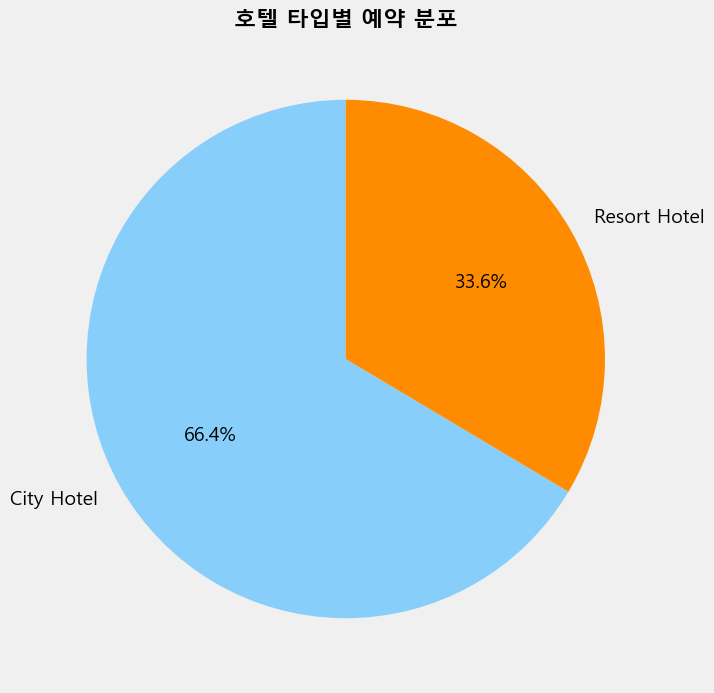

In [2]:

# 그래프 크기 설정 (가로 8, 세로 8 인치)
plt.rcParams["figure.figsize"] = 8, 8

# 호텔 타입별 데이터 개수 계산
# labels: 호텔 타입 이름 리스트 (예: ['City Hotel', 'Resort Hotel'])
labels = hotel_data["hotel"].value_counts().index.tolist()

# sizes: 각 호텔 타입별 데이터 개수 리스트
sizes = hotel_data["hotel"].value_counts().tolist()

# 파이 차트 색상 설정 (주황색, 하늘색)
hotel_colors = ["lightskyblue","darkorange"]

# 파이 차트 생성 및 설정
# sizes: 각 섹션의 크기
# labels: 각 섹션의 라벨
# colors: 각 섹션의 색상
# autopct: 퍼센트 표시 형식 (%1.1f%% = 소수점 첫째자리까지)
# startangle: 시작 각도 (90도에서 시작)
# textprops: 텍스트 속성 (폰트 크기 14)
plt.pie(sizes, labels=labels, colors=hotel_colors, autopct="%1.1f%%", startangle=90,
        textprops={"fontsize": 14})

# 그래프 제목 설정
plt.title("호텔 타입별 예약 분포", fontsize=16, fontweight='bold')

# 그래프 표시
plt.show()

#### 2. 월별 호텔 예약 분포 
1. 월별/호텔Type별 분포 현황.

### 결론
1. City hotel과 Resort hotel 비슷한 성향이 보임.
2. City hotel 4월부터 10월까지가 성수기.
3. Resort Hotel은 7,8월이 가장 수요가 큼. 
  -> 리조트의 특성상 학생들 방학과 맞추어서 많아 지는 것으로 분석됨

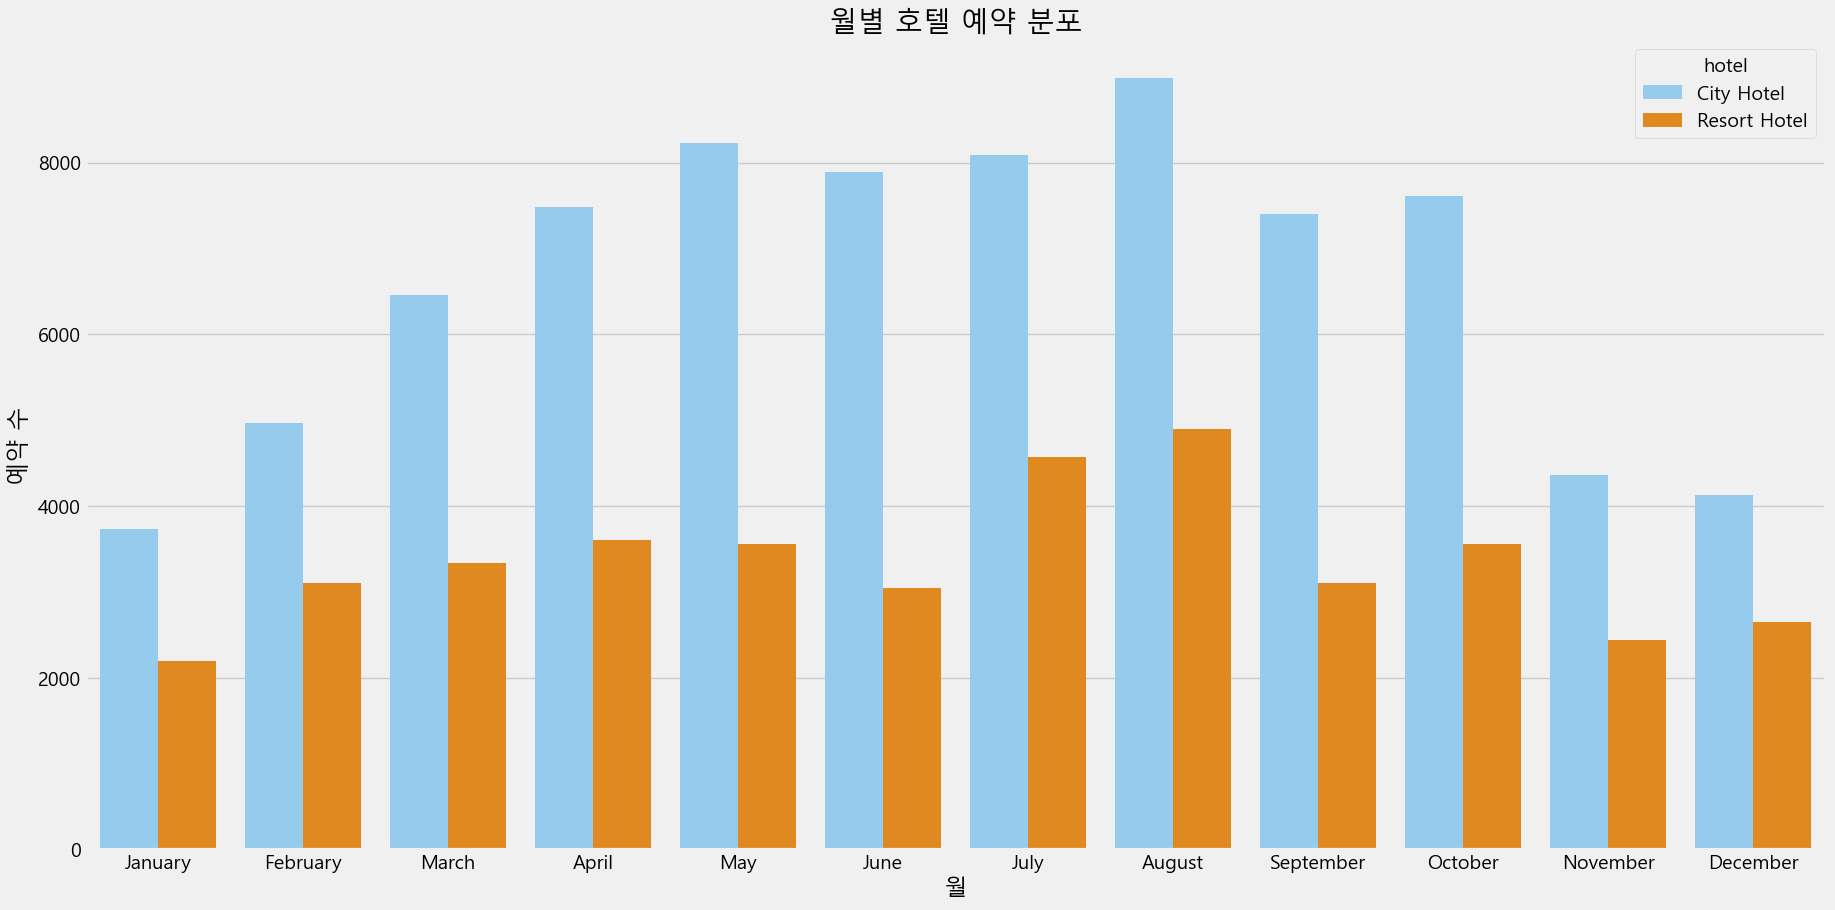

In [16]:
# 월 순서 정의
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
# 일관된 호텔 타입 순서 정의 (색상/순서 통일)
# 이 순서대로 막대가 왼쪽에서 오른쪽으로, 범례(Legend)가 위에서 아래로 표시됩니다.
hotel_order = ["City Hotel", "Resort Hotel"] 

# 그래프 크기 설정 (가로 20, 세로 10 인치)
plt.figure(figsize=(20, 10))

# 분석에 사용할 컬럼 선택 (호텔 타입, 도착 월)
myList = ["hotel", "arrival_date_month"]

# 월별 예약 수를 호텔 타입별로 구분하여 막대 그래프 생성
# order: x축 월 순서 지정, hue_order: 호텔 타입의 순서(색상)를 통일
sns.countplot(data=hotel_data[myList], x="arrival_date_month", hue="hotel", order=month_order,palette=hotel_colors,  hue_order=hotel_order).set_title(
     "월별 호텔 예약 분포")

# x축 라벨 설정
plt.xlabel("월")
# y축 라벨 설정  
plt.ylabel("예약 수")

# 그래프 표시
plt.show()


#### 3. 월별 호텔 취소 현황 
1. 월별/호텔Type별 취소 분포 현황.

### 결론
1. City/Resort 관계 없이 호텔 예약과 비슷하게 경향으로 취소가 이루어짐.

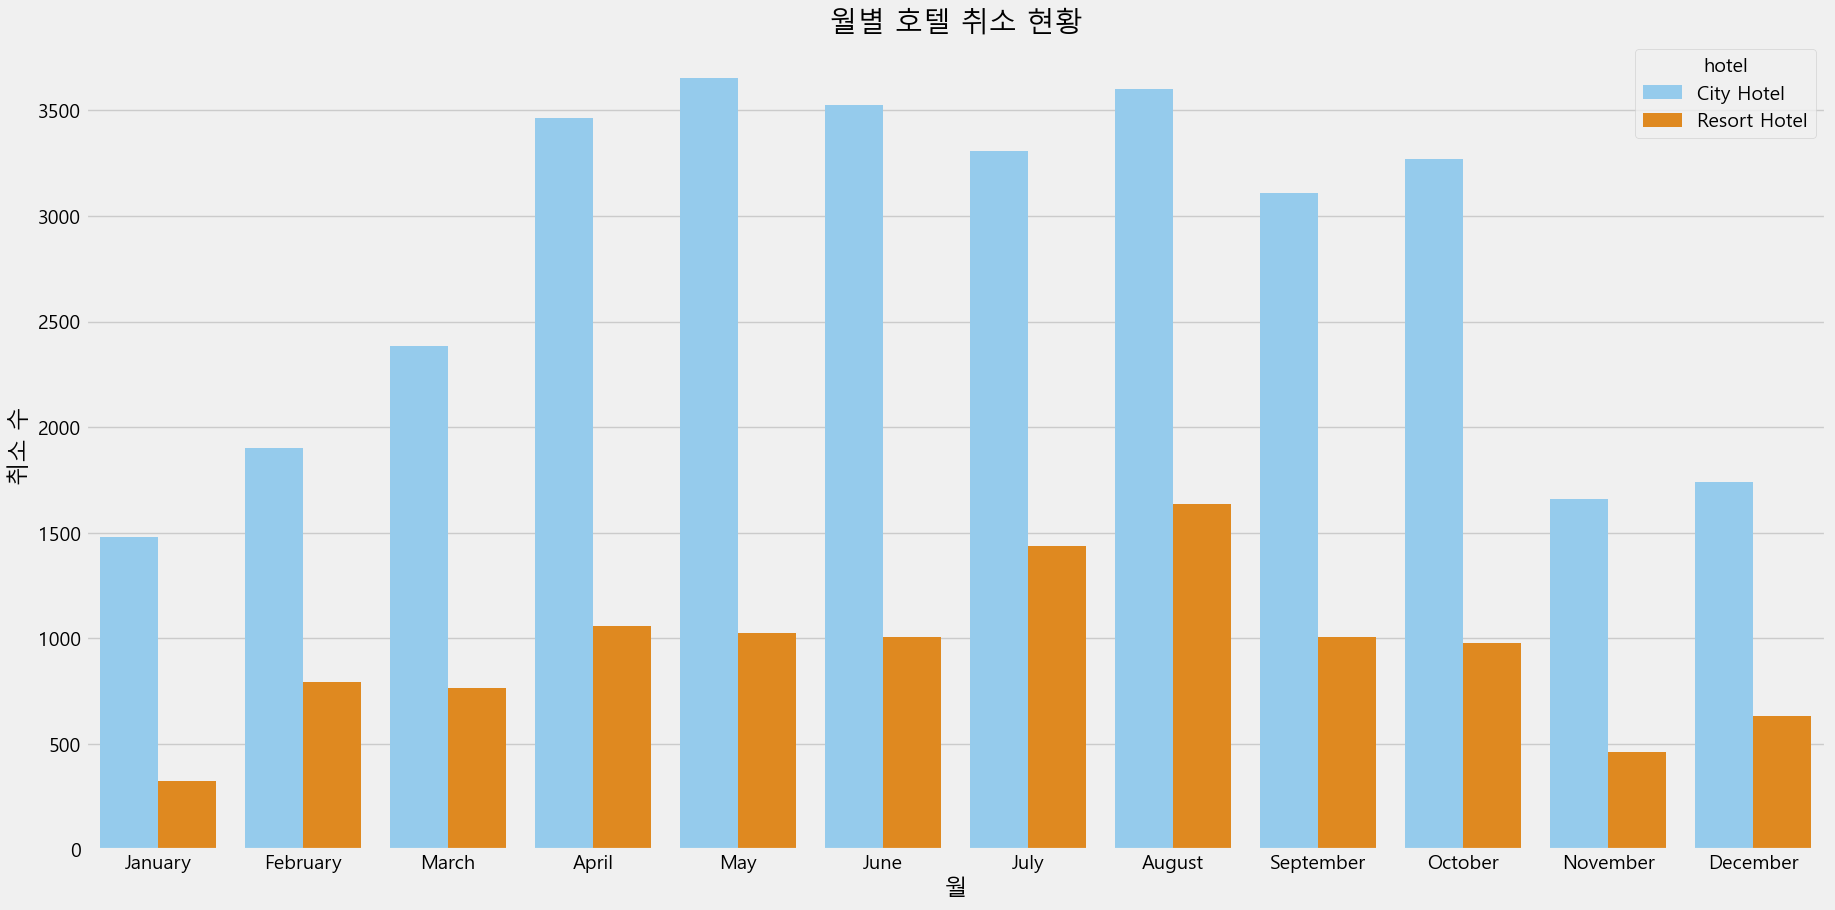

In [5]:


# 그래프 크기 설정 (가로 20, 세로 5 인치)
plt.figure(figsize=(20, 10))

# 월별, 호텔별, 취소 여부별로 그룹화하여 취소된 예약 수 계산
# groupby로 그룹화 후 size()로 각 그룹의 개수를 계산
hotel_data_cancel = hotel_data.groupby(["arrival_date_month", "hotel", "is_canceled"]).size().reset_index(name="count")

# 취소된 예약만 필터링 (is_canceled == 1)
hotel_data_cancel = hotel_data_cancel[hotel_data_cancel["is_canceled"] == 1]


# 월별 취소 수를 호텔 타입별로 구분하여 막대 그래프 생성
# data: 취소된 예약 데이터
# x: x축에 표시할 컬럼 (도착 월)
# y: y축에 표시할 값 (취소 수)
# hue: 색상으로 구분할 컬럼 (호텔 타입)
# order: 월의 순서를 올바르게 정렬
sns.barplot(data=hotel_data_cancel, x="arrival_date_month", y="count", hue="hotel",hue_order=hotel_order,palette=hotel_colors, order=[
   "January", "February", "March", "April", "May", "June",
   "July", "August", "September", "October", "November", "December"]).set_title(
    "월별 호텔 취소 현황")

# x축 라벨 설정
plt.xlabel("월")
# y축 라벨 설정  
plt.ylabel("취소 수")

# 그래프 표시
plt.show()


#### 4. 월별  예약수와 최소수 비율  
1. 월별/호텔Type별 취소 비율 현황.

### 결론
1. City hotel이 Resort Hotel보다 더 많은 취소율을 보임.

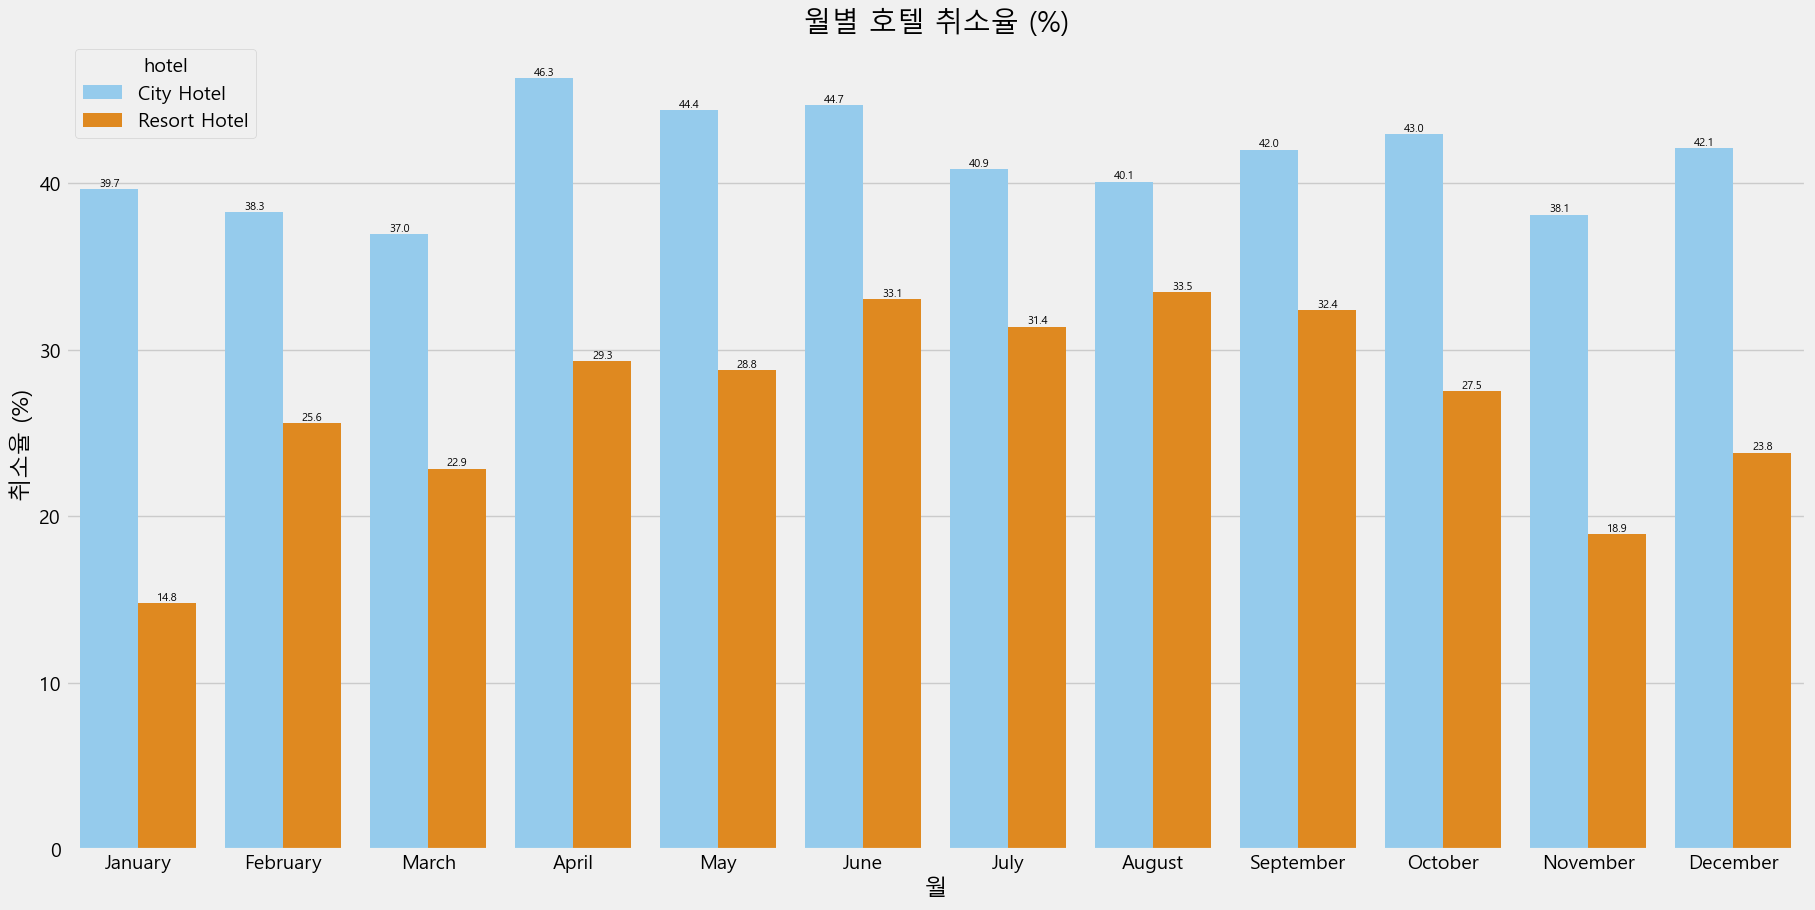

In [6]:
# 그래프 크기 설정 (가로 20, 세로 10 인치)
plt.figure(figsize=(20, 10))

# 월별, 호텔별로 총 예약수와 취소수 계산
hotel_data_summary = hotel_data.groupby(["arrival_date_month", "hotel"]).agg({
    'is_canceled': ['count', 'sum']  # count: 총 예약수, sum: 취소수
}).reset_index()

# 컬럼명 정리 (다중 레벨 컬럼명을 단순화)
hotel_data_summary.columns = ['arrival_date_month', 'hotel', 'total_bookings', 'cancelled_bookings']

# 취소율 계산 (취소수 / 총 예약수 * 100)
hotel_data_summary['cancellation_rate'] = (hotel_data_summary['cancelled_bookings'] / 
                                          hotel_data_summary['total_bookings'] * 100).round(2)

# 취소율을 호텔 타입별로 구분하여 막대 그래프 생성
ax = sns.barplot(data=hotel_data_summary, x="arrival_date_month", y="cancellation_rate",palette=hotel_colors, 
           hue="hotel", order=[
               "January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]).set_title(
               "월별 호텔 취소율 (%)")

# 막대 그래프 위에 숫자 값 표시
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f', fontsize=8 )

# x축 라벨 설정
plt.xlabel("월")
# y축 라벨 설정  
plt.ylabel("취소율 (%)")

# 그래프 표시
plt.show()

In [ ]:
#### 5) 월별/호텔별 연령대별 순고객 수 집계.  
1. 취소 고객을 제외한 월별/호텔Type별 연령대별 순고객수.(adults, children, babies 로 나누어서 표시)

### 결론
1. City hotel의 경우 아동수와 성인수가 비슷한 경향을 가진다.
2. Resort hotel의 경우 7월,8월 유아의 숫자가 많아 진다.(휴가철시 가족단위 여행객이 많은 것으로 사료됨)

<Figure size 2000x1000 with 0 Axes>

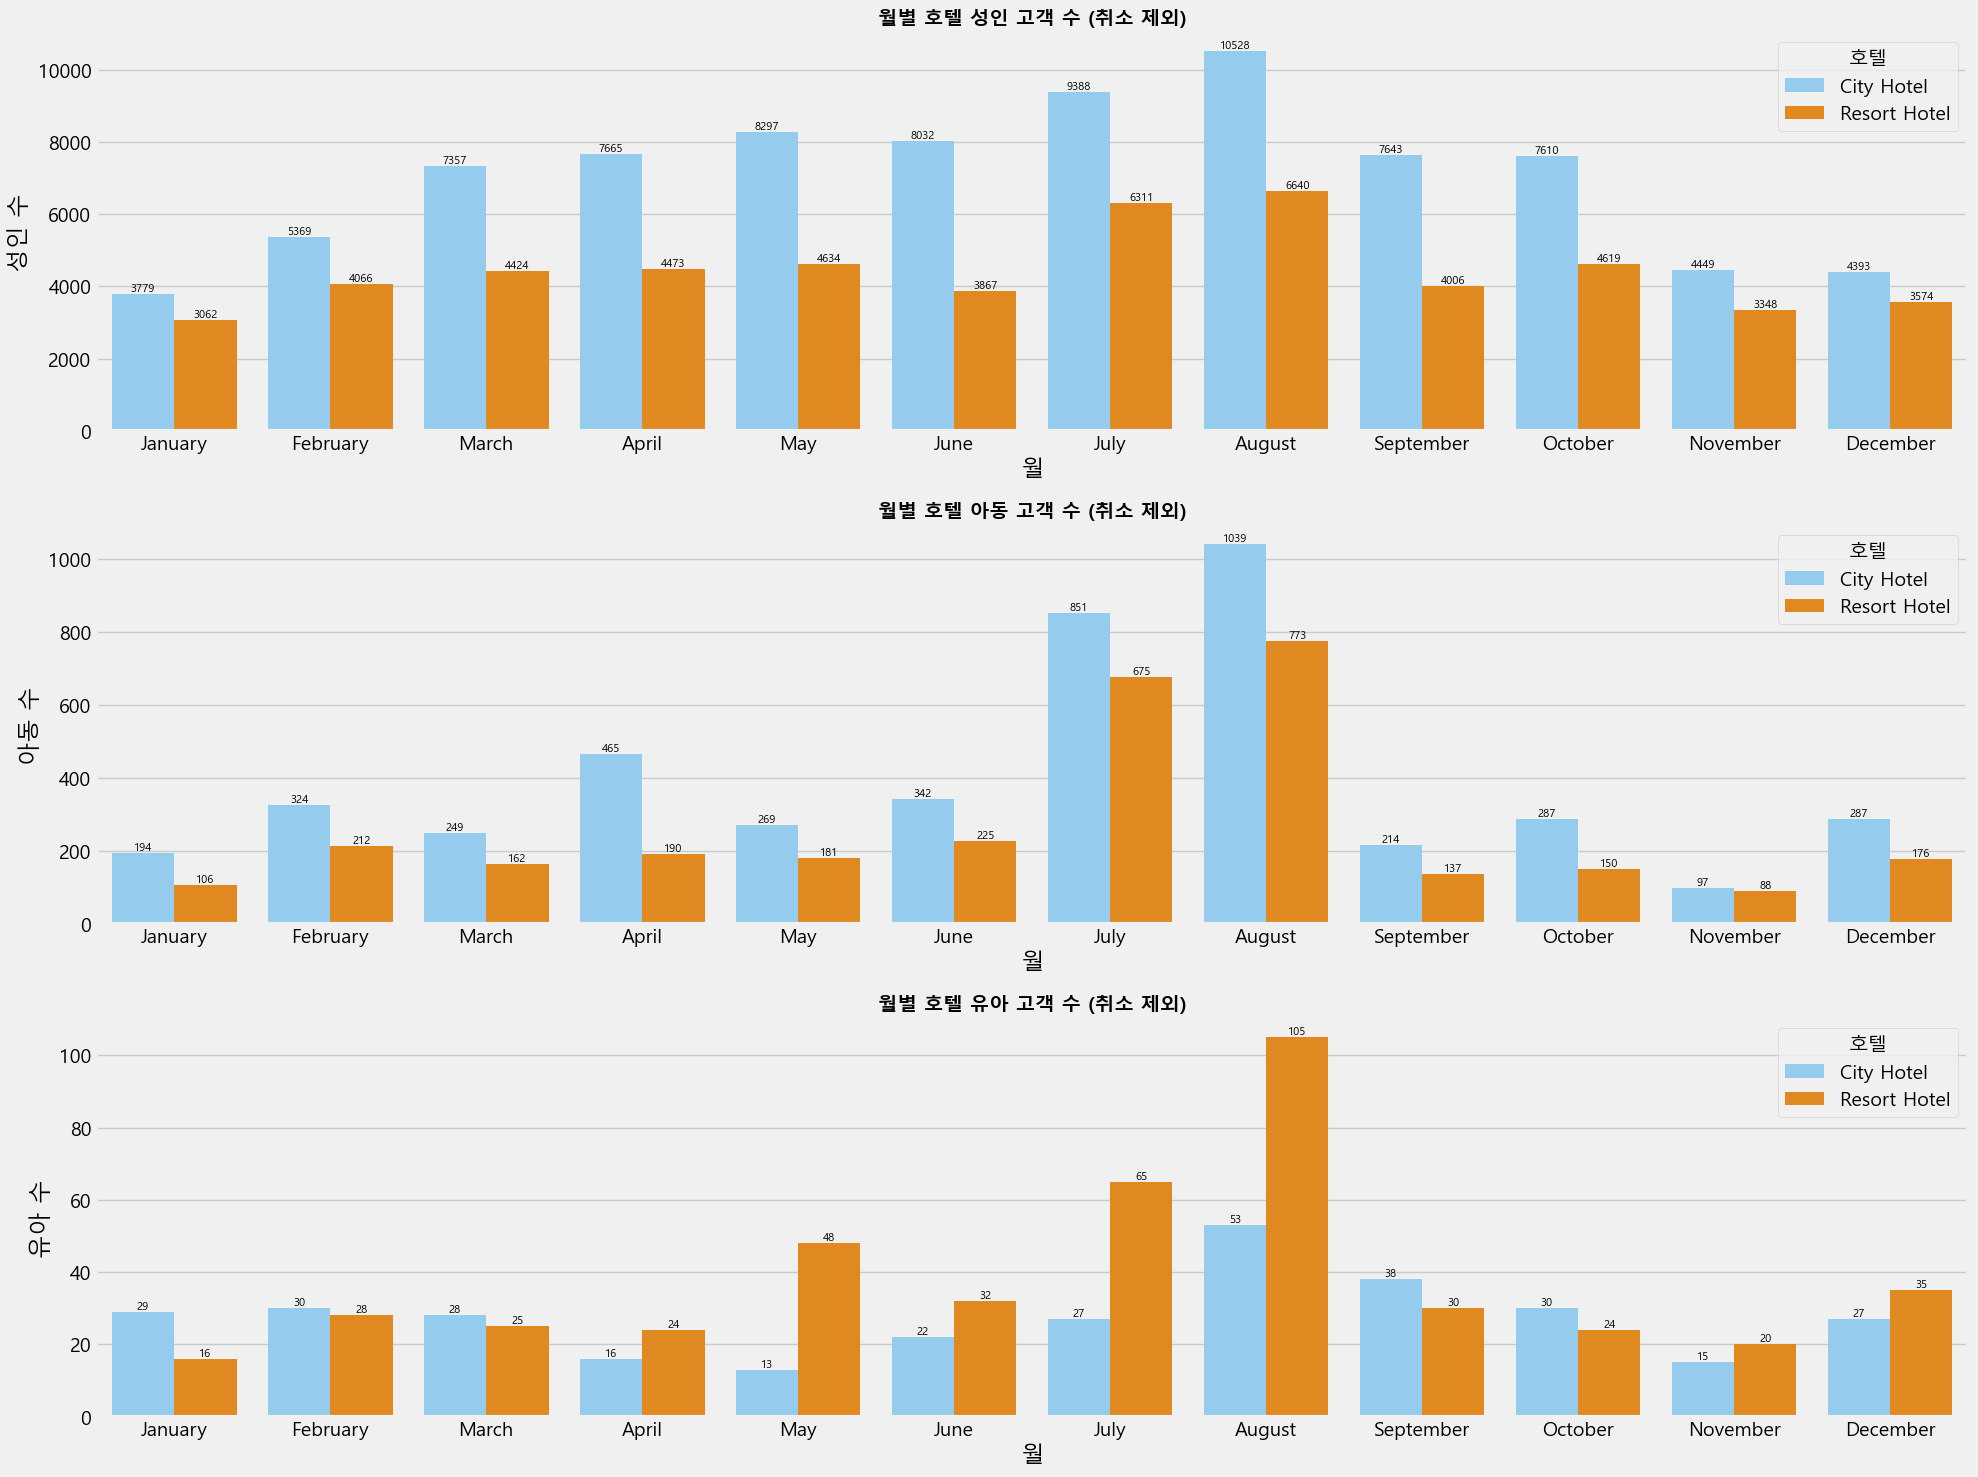

In [8]:

# 취소되지 않은 예약만 필터링 (is_canceled == 0)
hotel_data_not_cancelled = hotel_data[hotel_data["is_canceled"] == 0]

# 월별, 호텔별로 그룹화하여 adults, children, babies 합계 계산
hotel_age_summary = hotel_data_not_cancelled.groupby(["arrival_date_month", "hotel"]).agg({
    'adults': 'sum',      # 성인 수 합계
    'children': 'sum',    # 아동 수 합계  
    'babies': 'sum'       # 유아 수 합계
}).reset_index()

# 컬럼명을 한글로 변경하여 가독성 향상
hotel_age_summary.columns = ['월', '호텔', '성인수', '아동수', '유아수']

# 월 순서를 올바르게 정렬
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# 월 순서대로 데이터 정렬
hotel_age_summary['월'] = pd.Categorical(hotel_age_summary['월'], categories=month_order, ordered=True)
hotel_age_summary = hotel_age_summary.sort_values(['월', '호텔'])

# 시각화를 위한 데이터 준비 (월별 순서대로)
hotel_age_summary_viz = hotel_age_summary.copy()
hotel_age_summary_viz['월'] = hotel_age_summary_viz['월'].astype(str)

# 그래프 크기 설정
plt.figure(figsize=(20, 10))

# 서브플롯 생성 (3개 그래프를 세로로 배치)
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

# 1. 성인 수 막대 그래프
sns.barplot(data=hotel_age_summary_viz, x="월", y="성인수", hue="호텔", ax=axes[0], order=month_order,palette=hotel_colors)
axes[0].set_title("월별 호텔 성인 고객 수 (취소 제외)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("월")
axes[0].set_ylabel("성인 수")

# 막대 위에 숫자 표시
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=8)

# 2. 아동 수 막대 그래프
sns.barplot(data=hotel_age_summary_viz, x="월", y="아동수", hue="호텔", ax=axes[1], order=month_order,palette=hotel_colors)
axes[1].set_title("월별 호텔 아동 고객 수 (취소 제외)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("월")
axes[1].set_ylabel("아동 수")

# 막대 위에 숫자 표시
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=8)

# 3. 유아 수 막대 그래프
sns.barplot(data=hotel_age_summary_viz, x="월", y="유아수", hue="호텔", ax=axes[2], order=month_order,palette=hotel_colors)
axes[2].set_title("월별 호텔 유아 고객 수 (취소 제외)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("월")
axes[2].set_ylabel("유아 수")

# 막대 위에 숫자 표시
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%d', fontsize=8)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

#### 6) 연령대별 고객수 통합 시각화(라인차트).  
1. 취소 고객을 제외한 월별/호텔Type별 연령대별 순고객수.(adults, children, babies 로 나누어서 표시)
2. 3가지 그래프가 아닌 라인차트로 하나의 그래프로 표시시
### 결론
1. 3개의 그래프로 나누지 않고 하나의 그래프로 표시.(통합 비교)

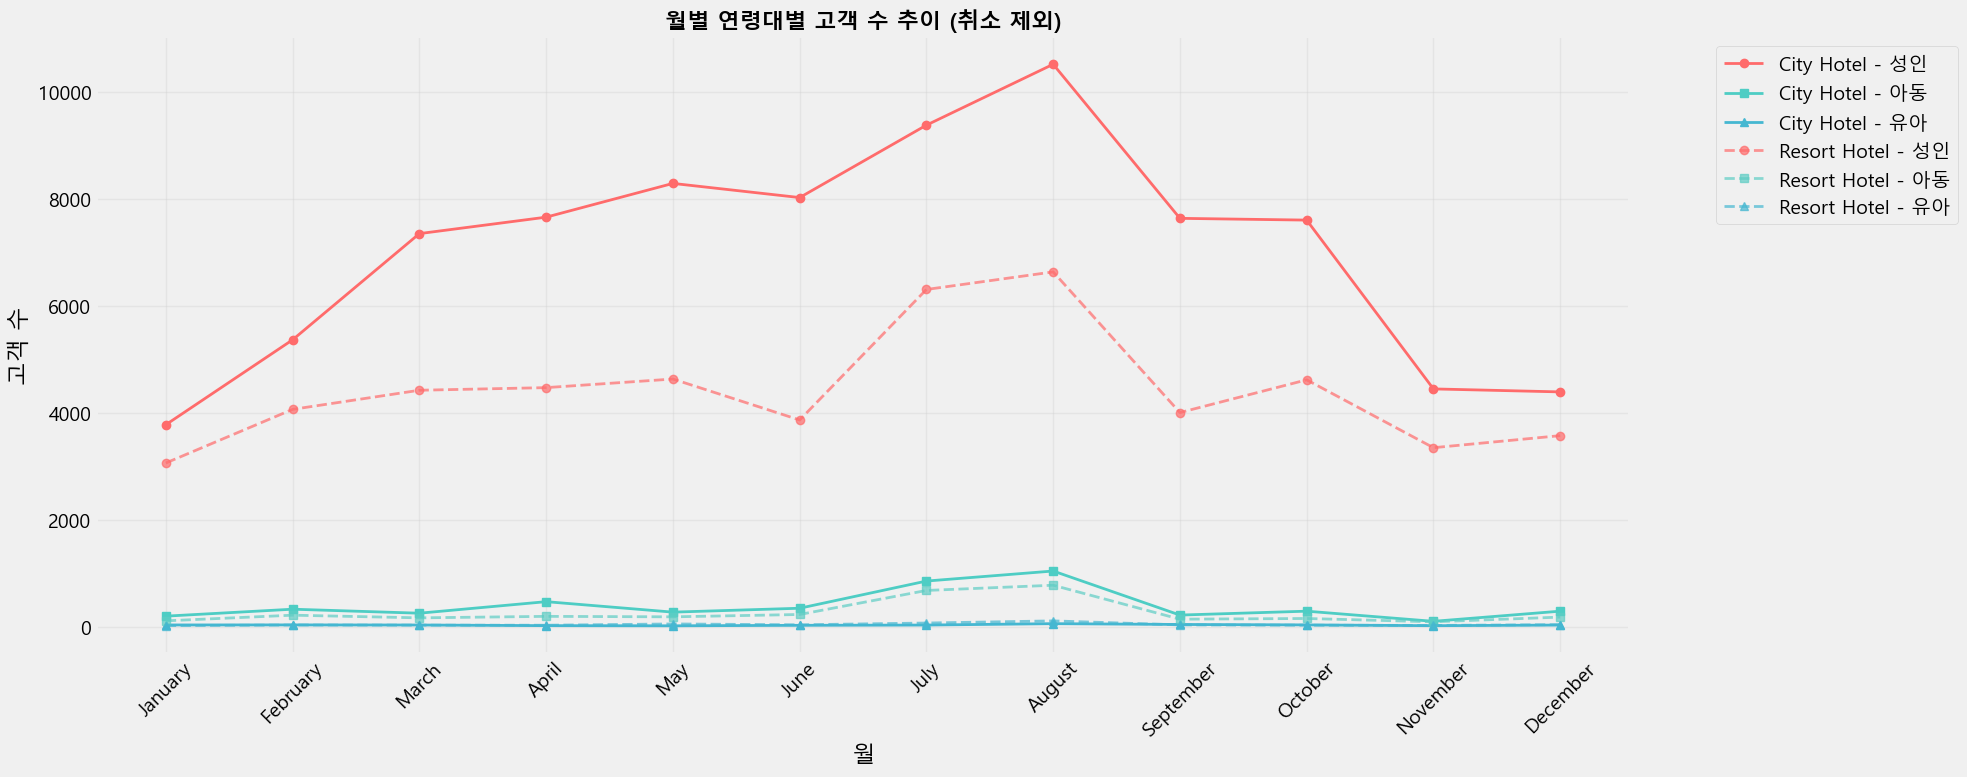

In [15]:

# 라인 차트 (연령대별 추이)
plt.figure(figsize=(20, 8))

# 월별 순서대로 정렬
hotel_age_sorted = hotel_age_summary_viz.copy()
hotel_age_sorted['월'] = pd.Categorical(hotel_age_sorted['월'], categories=month_order, ordered=True)
hotel_age_sorted = hotel_age_sorted.sort_values(['월', '호텔'])

# City Hotel과 Resort Hotel 데이터 분리
city_data = hotel_age_sorted[hotel_age_sorted['호텔'] == 'City Hotel']
resort_data = hotel_age_sorted[hotel_age_sorted['호텔'] == 'Resort Hotel']

# 라인 차트 생성
plt.plot(city_data['월'], city_data['성인수'], marker='o', linewidth=2, label='City Hotel - 성인', color='#FF6B6B')
plt.plot(city_data['월'], city_data['아동수'], marker='s', linewidth=2, label='City Hotel - 아동', color='#4ECDC4')
plt.plot(city_data['월'], city_data['유아수'], marker='^', linewidth=2, label='City Hotel - 유아', color='#45B7D1')

plt.plot(resort_data['월'], resort_data['성인수'], marker='o', linewidth=2, linestyle='--', label='Resort Hotel - 성인', color='#FF6B6B', alpha=0.7)
plt.plot(resort_data['월'], resort_data['아동수'], marker='s', linewidth=2, linestyle='--', label='Resort Hotel - 아동', color='#5ECDC4', alpha=0.7)
plt.plot(resort_data['월'], resort_data['유아수'], marker='^', linewidth=2, linestyle='--', label='Resort Hotel - 유아', color='#45B7D1', alpha=0.7)

plt.title('월별 연령대별 고객 수 추이 (취소 제외)', fontsize=16, fontweight='bold')
plt.xlabel('월')
plt.ylabel('고객 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 7) 상위 20개 나라 호텔 타입별 순예약수  
1. 취소 고객을 제외한 월별/호텔Type별 연령대별 순고객수.(adults, children, babies 로 나누어서 표시)
2. 3가지 그래프가 아닌 라인차트로 하나의 그래프로 표시시
### 결론
1. 3개의 그래프로 나누지 않고 하나의 그래프로 표시.(통합 비교)

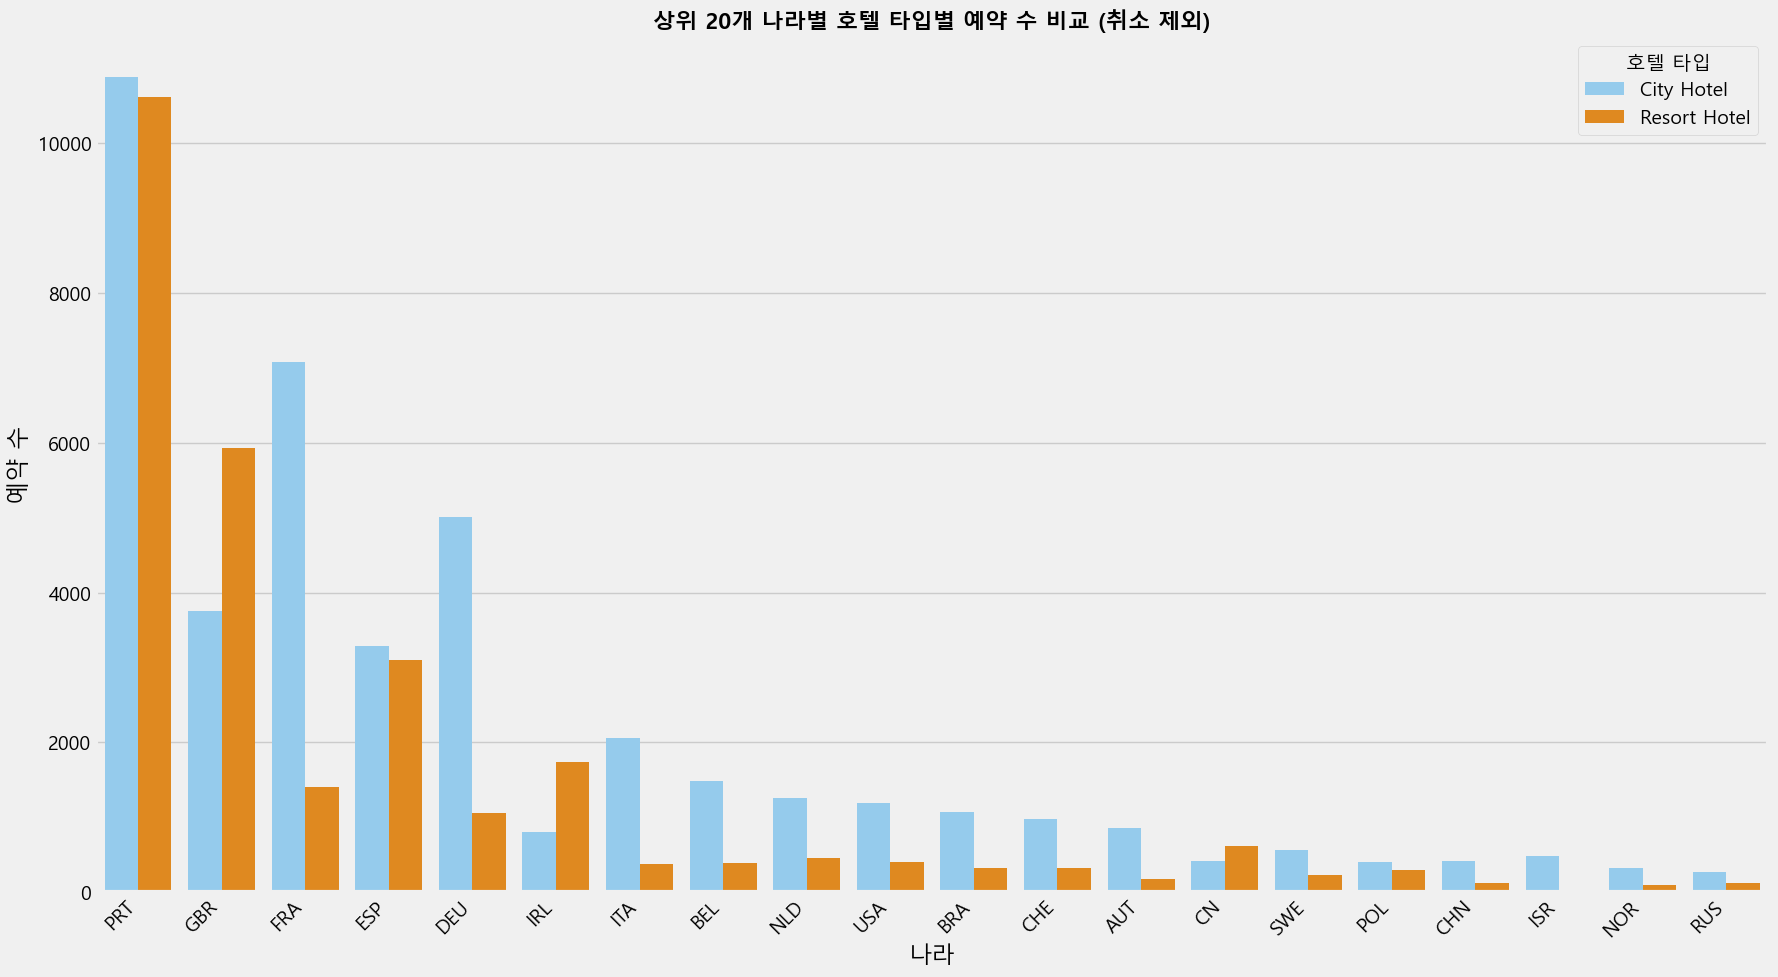

In [14]:

# ================================
# City Hotel 및 Resort Hotel 데이터프레임 분리
# (상위 국가 분석을 위해 필요)
# ================================
# 'city_data'와 'resort_data' 변수를 정의하여 다음 분석에서 사용할 수 있도록 합니다.
city_data = hotel_data[hotel_data["hotel"] == "City Hotel"].copy()
resort_data = hotel_data[hotel_data["hotel"] == "Resort Hotel"].copy()

# ================================
# 상위 20개 나라별 호텔 타입별 예약 수 비교 시각화 (수직 그룹 막대 그래프)
# ================================

# 상위 20개 나라 선택 (취소되지 않은 예약 수 기준)
top_countries = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().head(20).index

# 상위 나라들의 City vs Resort 예약 수 비교를 위한 데이터 준비
comparison_data = []
for country in top_countries:
    city_count = city_data[(city_data['country'] == country) & (city_data['is_canceled'] == 0)].shape[0]
    resort_count = resort_data[(resort_data['country'] == country) & (resort_data['is_canceled'] == 0)].shape[0]
    
    comparison_data.append({
        'country': country,
        'City Hotel': city_count,      # 컬럼 이름을 바로 'City Hotel'로 변경하여 이후 melt 과정 단순화
        'Resort Hotel': resort_count,  # 컬럼 이름을 바로 'Resort Hotel'로 변경
        'total': city_count + resort_count
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('total', ascending=False) # 수직 그래프를 위해 내림차순 정렬

# 나라 순서를 정의 (차트 순서 유지를 위해)
country_order = comparison_df['country'].tolist()

# 긴 형식(Long Format)으로 데이터 변환: Seaborn 그룹 막대 그래프를 위해 필요
# 'City Hotel', 'Resort Hotel' 컬럼을 'Hotel Type'과 'Bookings'로 변환
comparison_df_long = comparison_df.melt(
    id_vars='country', 
    value_vars=['City Hotel', 'Resort Hotel'],
    var_name='Hotel Type', 
    value_name='Bookings'
)

# 그래프 크기 설정 (x축 라벨이 많으므로 넓게 설정)
plt.figure(figsize=(18, 10))

# 수직 그룹 막대 그래프 생성
# x: 나라, y: 예약 수, hue: 호텔 타입
# order: 나라 순서 적용, hue_order: 호텔 타입 순서 적용
sns.barplot(
    data=comparison_df_long, 
    x='country', 
    y='Bookings', 
    hue='Hotel Type',
    order=country_order,  
    hue_order=hotel_order,
    palette=hotel_colors
).set_title('상위 20개 나라별 호텔 타입별 예약 수 비교 (취소 제외)', fontsize=16, fontweight='bold')

plt.xlabel('나라')
plt.ylabel('예약 수')
# x축 라벨이 겹치지 않도록 45도 회전
plt.xticks(rotation=45, ha='right') 
plt.legend(title='호텔 타입')

plt.tight_layout()
plt.show()



#### 8) 상위 20개 나라 히트맵
1. 엑셀 형태의 행은 나라,열은 월을 나타내며 25%씩 색상으로 구분.


### 결론
1. 상위 나라와 하위 나라의 차이가 매우 심함.

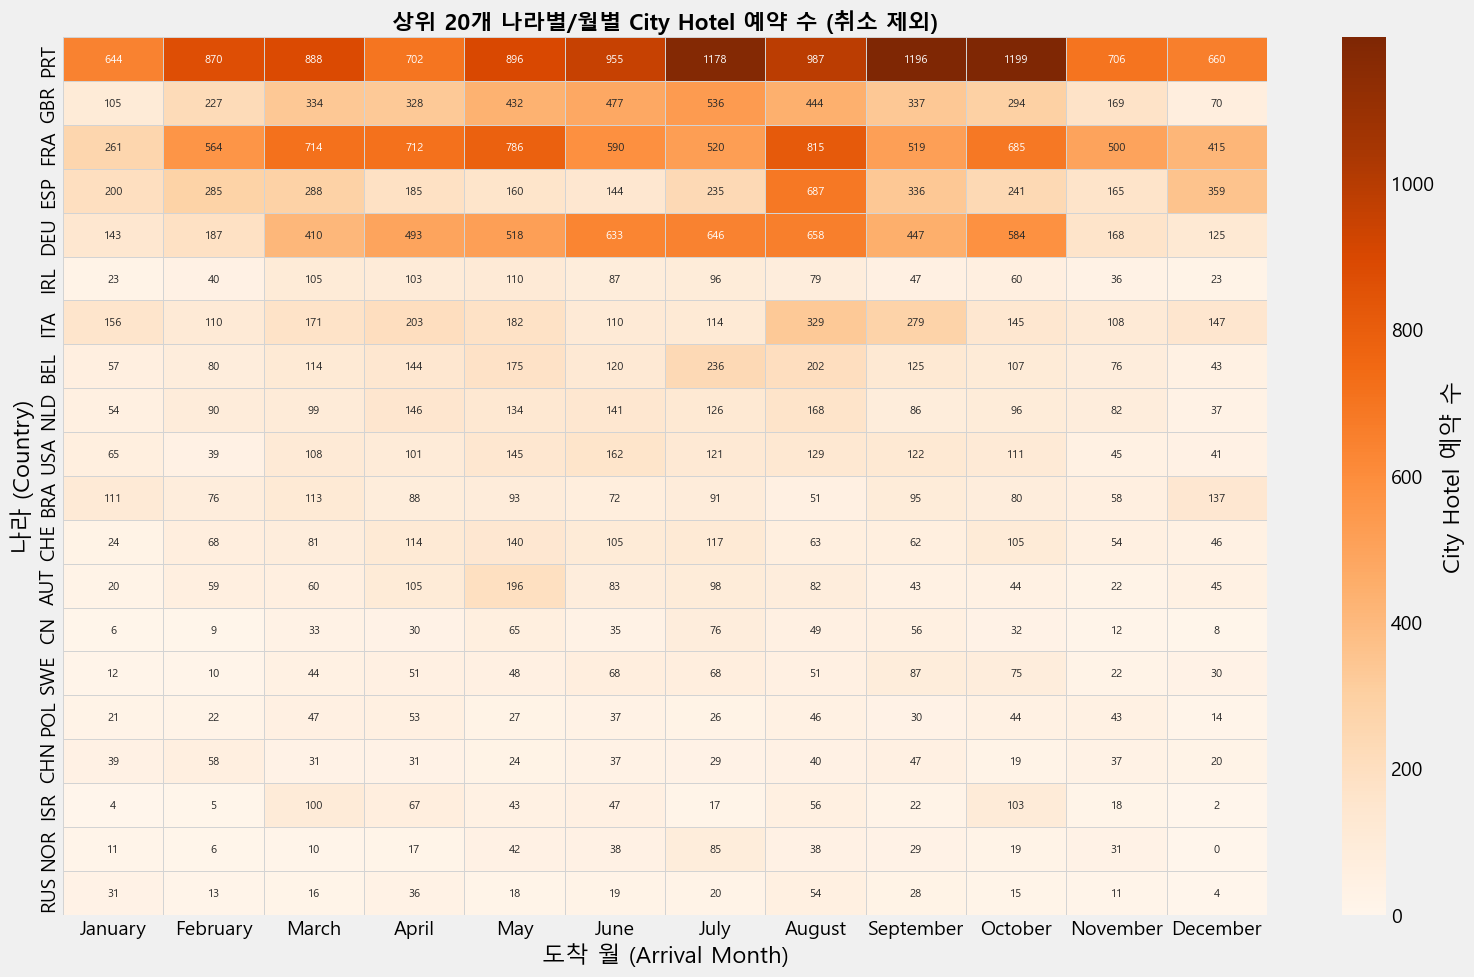

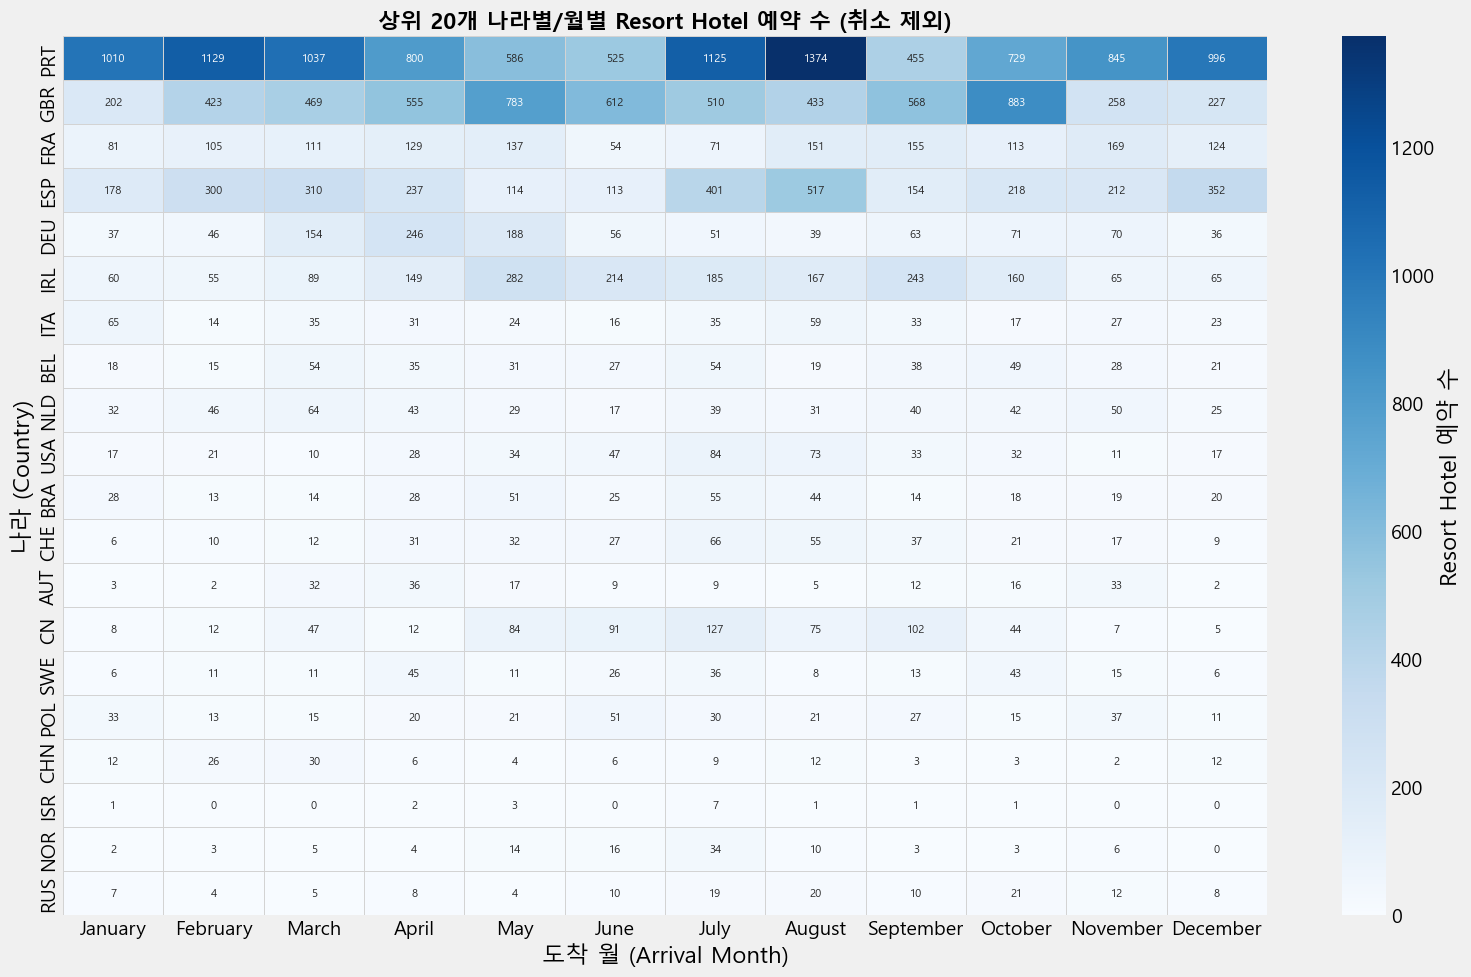

In [17]:

# 데이터 준비: 나라별로 City Hotel과 Resort Hotel 데이터를 합치기

# 1. 나라별, 월별 예약 수 계산 (취소 제외)
city_monthly = city_data[city_data['is_canceled'] == 0].groupby(['country', 'arrival_date_month']).size().reset_index(name='bookings')
resort_monthly = resort_data[resort_data['is_canceled'] == 0].groupby(['country', 'arrival_date_month']).size().reset_index(name='bookings')

# 2. 데이터 합치기 (상위 20개 나라 선정용)
combined_data = pd.concat([city_monthly, resort_monthly], ignore_index=True)

# 3. 나라별 총 예약 수 계산 및 상위 20개 나라 선택
country_totals = combined_data.groupby('country')['bookings'].sum()
top_20_countries = country_totals.nlargest(20).index.tolist()

# 4. 월 순서 정의
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# 5. 새로운 데이터프레임 생성 (City/Resort 예약 수 분리) 및 상위 20개 나라 필터링
expanded_data = []
for country in top_20_countries: # 상위 20개 나라만 반복
    for month in month_order: # 모든 월에 대해 반복
        
        # City Hotel 예약 수 계산
        city_val = city_monthly[(city_monthly['country'] == country) & 
                                (city_monthly['arrival_date_month'] == month)]['bookings'].sum()
        # Resort Hotel 예약 수 계산
        resort_val = resort_monthly[(resort_monthly['country'] == country) & 
                                    (resort_monthly['arrival_date_month'] == month)]['bookings'].sum()
        
        expanded_data.append({
            'country': country,
            'month': month,
            'city_bookings': city_val,
            'resort_bookings': resort_val
        })

expanded_df_top20 = pd.DataFrame(expanded_data)

# 6. 시각화를 위한 피벗 테이블 생성
# City Hotel 데이터
city_pivot = expanded_df_top20.pivot(index='country', columns='month', values='city_bookings')
# Resort Hotel 데이터
resort_pivot = expanded_df_top20.pivot(index='country', columns='month', values='resort_bookings')

# 월 순서 및 나라 순서(예약 총합이 많은 순) 정렬
city_pivot = city_pivot.reindex(columns=month_order, index=top_20_countries, fill_value=0)
resort_pivot = resort_pivot.reindex(columns=month_order, index=top_20_countries, fill_value=0)


# City Hotel 예약 히트맵 생성
plt.figure(figsize=(16, 10))

sns.heatmap(city_pivot, 
            annot=True, 
            fmt='.0f', 
            cmap='Oranges', 
            cbar_kws={'label': 'City Hotel 예약 수'},
            linewidths=0.5,
            linecolor='lightgray',
            annot_kws={"size": 8})

plt.title('상위 20개 나라별/월별 City Hotel 예약 수 (취소 제외)', fontsize=16, fontweight='bold')
plt.xlabel('도착 월 (Arrival Month)')
plt.ylabel('나라 (Country)')

plt.tight_layout()
plt.show()

# Resort Hotel 예약 히트맵 생성 (비교용)
plt.figure(figsize=(16, 10))

sns.heatmap(resort_pivot, 
            annot=True, 
            fmt='.0f', 
            cmap='Blues', 
            cbar_kws={'label': 'Resort Hotel 예약 수'},
            linewidths=0.5,
            linecolor='lightgray',
            annot_kws={"size": 8})

plt.title('상위 20개 나라별/월별 Resort Hotel 예약 수 (취소 제외)', fontsize=16, fontweight='bold')
plt.xlabel('도착 월 (Arrival Month)')
plt.ylabel('나라 (Country)')

plt.tight_layout()
plt.show()

#### 9) Lead Time Box 플롯.
1. IQR분석

### 결론
1.365일 이상 예약은 오기로 나타난 것으로 판단됨.

C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\2303867234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax7 = sns.boxplot(x='hotel', y='lead_time', data=hotel_data, order=hotel_order, palette=hotel_colors)


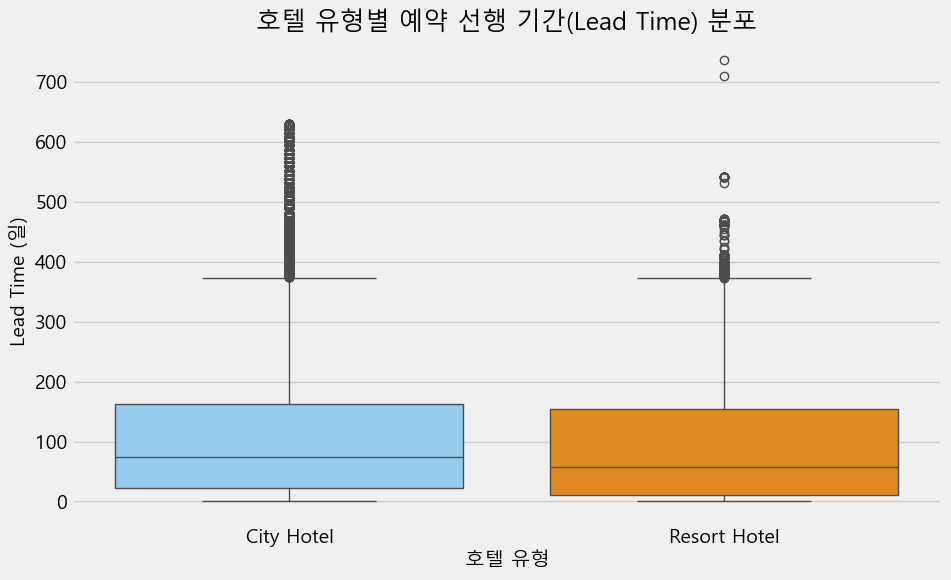

In [21]:
# 호텔 유형별 Lead Time 분포 (IQR 분석)

plt.figure(figsize=(10, 6))
# Box plot을 사용하여 Lead Time의 4분위수(IQR)와 이상치를 시각화
ax7 = sns.boxplot(x='hotel', y='lead_time', data=hotel_data, order=hotel_order, palette=hotel_colors)
plt.title('호텔 유형별 예약 선행 기간(Lead Time) 분포', fontsize=18)
plt.xlabel('호텔 유형', fontsize=14)
plt.ylabel('Lead Time (일)', fontsize=14)
plt.show()


### 10) Lead Time 분포.
1. Lead Time 은 0~365 일로 제한하고 0은 당일 예약으로 간주.

### 결론
1. 당일 예약이 제일 많은 것으로 나타남.


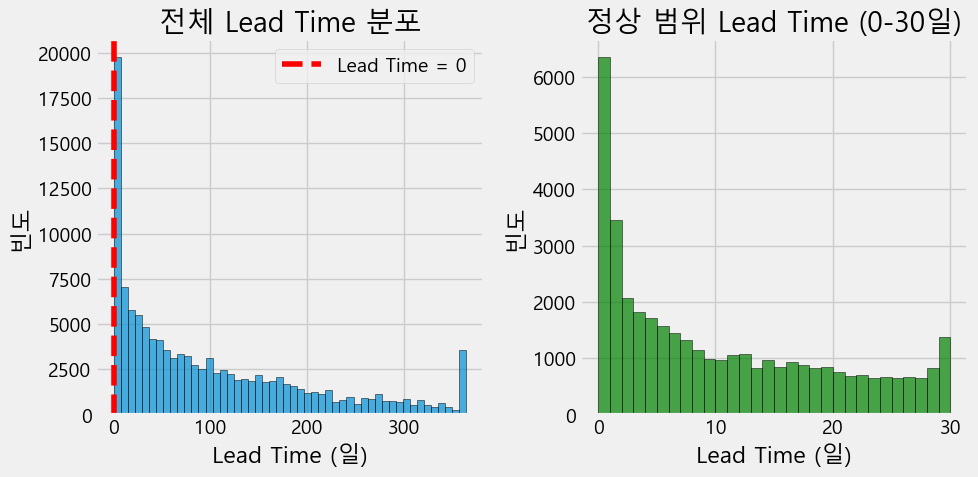

In [ ]:


# ================================
# Lead_time 오류 
# ================================
# 'lead_time' 컬럼의 이상치 처리: 0 미만은 0으로, 365 초과는 365로 제한합니다.
# np.clip 함수를 사용하여 값의 범위를 [0, 365]로 제한합니다.
hotel_data['lead_time'] = hotel_data['lead_time'].clip(lower=0, upper=365)
print("\n=== 'lead_time' 이상치 처리 완료 (0~365일로 제한) ===")

# Lead Time 분포 히스토그램
plt.figure(figsize=(10, 5))

# 전체 Lead Time 분포
plt.subplot(1, 2, 1)
plt.hist(hotel_data['lead_time'], bins=50, alpha=0.7, edgecolor='black')
plt.title('전체 Lead Time 분포')
plt.xlabel('Lead Time (일)')
plt.ylabel('빈도')
plt.axvline(x=0, color='red', linestyle='--', label='Lead Time = 0')
plt.legend()


# 0-30일 범위의 Lead Time
plt.subplot(1, 2, 2)
normal_data = hotel_data[(hotel_data['lead_time'] >= 0) & (hotel_data['lead_time'] <= 30)]['lead_time']
plt.hist(normal_data, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('정상 범위 Lead Time (0-30일)')
plt.xlabel('Lead Time (일)')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()

#### 11) 예약 선행 기간(Lead Time) 구간별 취소율.
1. Lead Time을 5개의 구간별로 나누고(뒤로 갈수록 넓게) 최소율 분석.


### 결론
1. 당일 예약도 6% 이상 취소가 일어남.
2. 181~365일은 반 이상 취소가 일어남.


C:\Users\nabid\AppData\Local\Temp\ipykernel_27876\1135480713.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.barplot(x=cancel_rate_by_lead_time.index, y=cancel_rate_by_lead_time.values, palette='viridis')


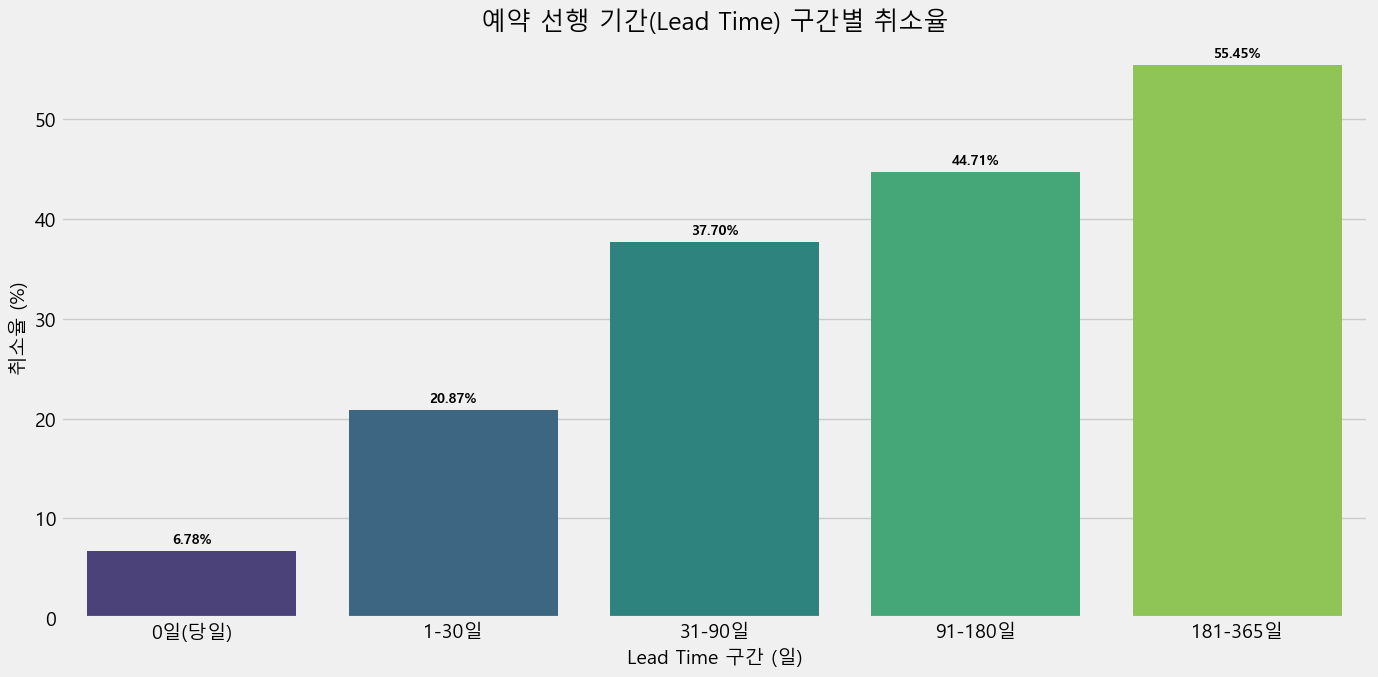

In [17]:

# 6. Lead Time 구간별 취소율 분석
# Lead Time을 범주형 구간으로 나누기
# 0일, 1-30일, 31-90일, 91-180일, 181-365일
bins = [-1, 0, 30, 90, 180, 365]
labels = ['0일(당일)', '1-30일', '31-90일', '91-180일', '181-365일']

# right=True: (a, b] 형태로, 0일 구간을 포함하기 위해 -1부터 시작
# include_lowest=True: -1 (가장 낮은 값)을 포함하여 0일 구간 정의
hotel_data['lead_time_group'] = pd.cut(hotel_data['lead_time'], bins=bins, labels=labels, right=True, include_lowest=True)

# 구간별 취소율 계산
cancel_rate_by_lead_time = hotel_data.groupby('lead_time_group', observed=False)['is_canceled'].mean() * 100

plt.figure(figsize=(14, 7))
ax6 = sns.barplot(x=cancel_rate_by_lead_time.index, y=cancel_rate_by_lead_time.values, palette='viridis')
plt.title('예약 선행 기간(Lead Time) 구간별 취소율', fontsize=18)
plt.xlabel('Lead Time 구간 (일)', fontsize=14)
plt.ylabel('취소율 (%)', fontsize=14)
plt.xticks(rotation=0) # x축 레이블 수평 유지

# 각 막대 위에 값 표시
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()



#### 12) 대륙별 호텔 타입별 예약수
1. 대륙별로 범주로 나누어서 분석.

### 결론
1. 대륙별로 범주로 나누어서 분석시 다른 대륙은 무의미, 유럽만 분석하거나 혹은 상위 20개 또는 10개로 분석이 필요.
2. 반대로 다른 대륙의 영업을 강화필요.


=== 대륙별 예약 분포 (취소 제외) ===
continent
유럽       67659
아메리카      3469
기타        1793
아시아       1099
아프리카       587
오세아니아      390
중동         169
Name: count, dtype: int64

=== 대륙별 호텔 타입별 예약 분포 ===
hotel      City Hotel  Resort Hotel
continent                          
기타               1099           694
아메리카             2628           841
아시아               871           228
아프리카              488            99
오세아니아             304            86
유럽              40698         26961
중동                140            29



C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\774046664.py:122: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continent_cancel_rate = hotel_data.groupby('continent').apply(


<Figure size 1500x1000 with 0 Axes>

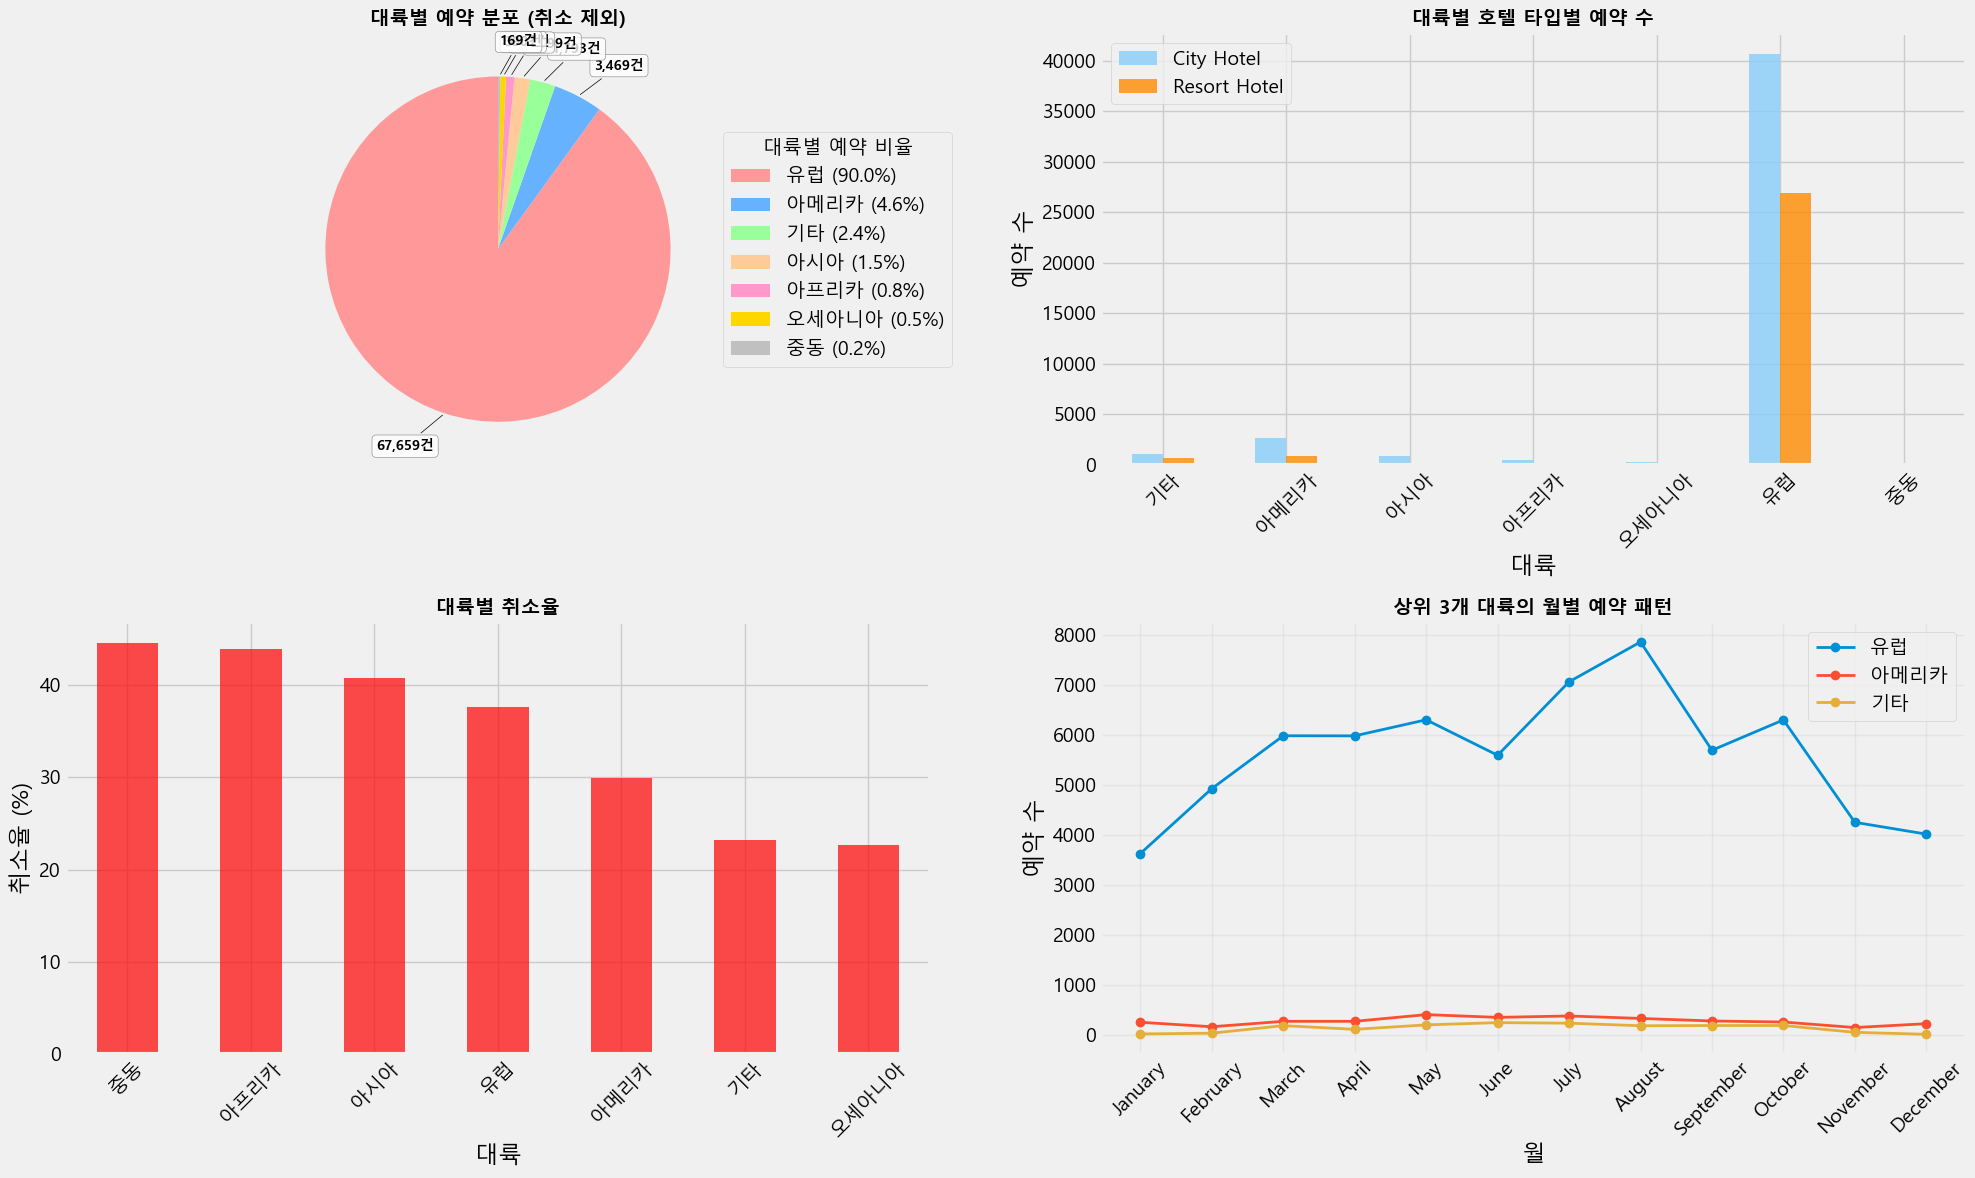

In [22]:

# 국가 코드를 대륙으로 매핑하는 함수
def get_continent(country_code):
    """
    국가 코드를 대륙으로 변환하는 함수
    
    Parameters:
    country_code (str): ISO 국가 코드 (예: 'PRT', 'GBR', 'FRA')
    
    Returns:
    str: 대륙명
    """
    # 유럽 국가들
    europe = ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'NLD', 'CHE', 'AUT', 'SWE', 'NOR', 'DNK', 
              'FIN', 'POL', 'CZE', 'HUN', 'GRC', 'TUR', 'RUS', 'UKR', 'ROU', 'BGR', 'HRV', 'SVN', 'SVK', 
              'LTU', 'LVA', 'EST', 'LUX', 'ISL', 'MLT', 'CYP']
    
    # 아시아 국가들
    asia = ['CHN', 'JPN', 'KOR', 'IND', 'THA', 'SGP', 'MYS', 'IDN', 'PHL', 'VNM', 'TWN', 'HKG', 'MAC', 'MMR', 
            'KHM', 'LAO', 'BGD', 'PAK', 'LKA', 'NPL', 'BTN', 'MNG', 'KAZ', 'UZB', 'KGZ', 'TJK', 'TKM']
    
    # 아메리카 국가들
    americas = ['USA', 'CAN', 'MEX', 'BRA', 'ARG', 'CHL', 'COL', 'PER', 'VEN', 'ECU', 'BOL', 'PRY', 'URY', 
                'CRI', 'PAN', 'GTM', 'HND', 'NIC', 'SLV', 'BLZ', 'JAM', 'TTO', 'BHS', 'DOM', 'CUB', 'HTI']
    
    # 아프리카 국가들
    africa = ['ZAF', 'EGY', 'MAR', 'TUN', 'DZA', 'LBY', 'SDN', 'ETH', 'KEN', 'GHA', 'NGA', 'SEN', 'CMR', 
              'CIV', 'MAD', 'UGA', 'TZA', 'ZWE', 'ZMB', 'MWI', 'BWA', 'NAM', 'MOZ', 'AGO', 'GAB', 'GNQ']
    
    # 오세아니아 국가들
    oceania = ['AUS', 'NZL', 'FJI', 'PNG', 'TON', 'WSM', 'VUT', 'SLB', 'KIR', 'NCL', 'PYF', 'COK', 'TUV']
    
    # 중동 국가들
    middle_east = ['SAU', 'ARE', 'QAT', 'KWT', 'BHR', 'OMN', 'YEM', 'JOR', 'LBN', 'SYR', 'IRQ', 'IRN', 'AFG']
    
    if country_code in europe:
        return '유럽'
    elif country_code in asia:
        return '아시아'
    elif country_code in americas:
        return '아메리카'
    elif country_code in africa:
        return '아프리카'
    elif country_code in oceania:
        return '오세아니아'
    elif country_code in middle_east:
        return '중동'
    else:
        return '기타'

# 호텔 데이터에 대륙 정보 추가
hotel_data['continent'] = hotel_data['country'].apply(get_continent)

# 대륙별 예약 분포 확인
print("=== 대륙별 예약 분포 (취소 제외) ===")
continent_data = hotel_data[hotel_data["is_canceled"] == 0]
continent_counts = continent_data['continent'].value_counts()
print(continent_counts)
print()

# 대륙별 호텔 타입별 예약 분포
continent_hotel_counts = continent_data.groupby(['continent', 'hotel']).size().unstack(fill_value=0)
print("=== 대륙별 호텔 타입별 예약 분포 ===")
print(continent_hotel_counts)
print()

## 4.4.1 대륙별 예약 분포 시각화
plt.figure(figsize=(15, 10))

# 서브플롯 생성 (2x2)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. 대륙별 총 예약 수 (파이 차트)
ax1 = axes[0, 0]

# 퍼센트 계산
total_count = continent_counts.sum()
percentages = (continent_counts.values / total_count * 100).round(1)

# 파이 차트 생성 (autopct 제거하여 그래프에 숫자 표시 안함)
wedges, texts = ax1.pie(continent_counts.values, 
                                   labels=None,  # 라벨을 None으로 설정
                                   autopct=None,  # 퍼센트 텍스트 제거
                                   startangle=90,
                                   colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#FFD700', '#C0C0C0'])

# 말풍선 스타일의 주석 추가 (각 섹션에 숫자 표시)
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.8)
kw = dict(arrowprops=dict(arrowstyle="-", color="black", lw=0.5), 
          bbox=bbox_props, zorder=0, va="center", fontsize=10, fontweight='bold')

for i, (wedge, count) in enumerate(zip(wedges, continent_counts.values)):
    # 각 섹션의 중심각 계산
    ang = (wedge.theta2 + wedge.theta1) / 2
    # 중심각을 라디안으로 변환
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    
    # 말풍선 위치 계산 (원 밖으로)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    # 말풍선으로 숫자 표시
    ax1.annotate(f'{count:,}건', xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

ax1.set_title('대륙별 예약 분포 (취소 제외)', fontsize=14, fontweight='bold')

# 범례 추가 (대륙 이름과 퍼센트 표시)
legend_labels = [f'{continent} ({percent}%)' for continent, percent in zip(continent_counts.index, percentages)]
ax1.legend(wedges, legend_labels, title="대륙별 예약 비율", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 2. 대륙별 호텔 타입별 예약 수 (막대 그래프)
ax2 = axes[0, 1]
continent_hotel_counts.plot(kind='bar', ax=ax2, color=hotel_colors, alpha=0.8)
ax2.set_title('대륙별 호텔 타입별 예약 수', fontsize=14, fontweight='bold')
ax2.set_xlabel('대륙')
ax2.set_ylabel('예약 수')
ax2.legend(['City Hotel', 'Resort Hotel'])
ax2.tick_params(axis='x', rotation=45)

# 3. 대륙별 취소율 계산
continent_cancel_rate = hotel_data.groupby('continent').apply(
    lambda x: (x['is_canceled'] == 1).sum() / len(x) * 100
).sort_values(ascending=False)

ax3 = axes[1, 0]
continent_cancel_rate.plot(kind='bar', ax=ax3, color='red', alpha=0.7)
ax3.set_title('대륙별 취소율', fontsize=14, fontweight='bold')
ax3.set_xlabel('대륙')
ax3.set_ylabel('취소율 (%)')
ax3.tick_params(axis='x', rotation=45)

# 4. 상위 대륙들의 월별 예약 패턴
ax4 = axes[1, 1]
top_continents = continent_counts.head(3).index
top_continent_data = continent_data[continent_data['continent'].isin(top_continents)]

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

for continent in top_continents:
    continent_monthly = top_continent_data[top_continent_data['continent'] == continent].groupby('arrival_date_month').size()
    continent_monthly = continent_monthly.reindex(month_order, fill_value=0)
    ax4.plot(continent_monthly.index, continent_monthly.values, marker='o', label=continent, linewidth=2)

ax4.set_title('상위 3개 대륙의 월별 예약 패턴', fontsize=14, fontweight='bold')
ax4.set_xlabel('월')
ax4.set_ylabel('예약 수')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 13) 국가별 취소율 
1. 예약 상위 10개국의 취소율.

### 결론
1. 포르투칼이 가장 높은 것으로 나타남. 관리필요.

C:\Users\nabid\AppData\Local\Temp\ipykernel_27876\574221950.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax10 = sns.barplot(


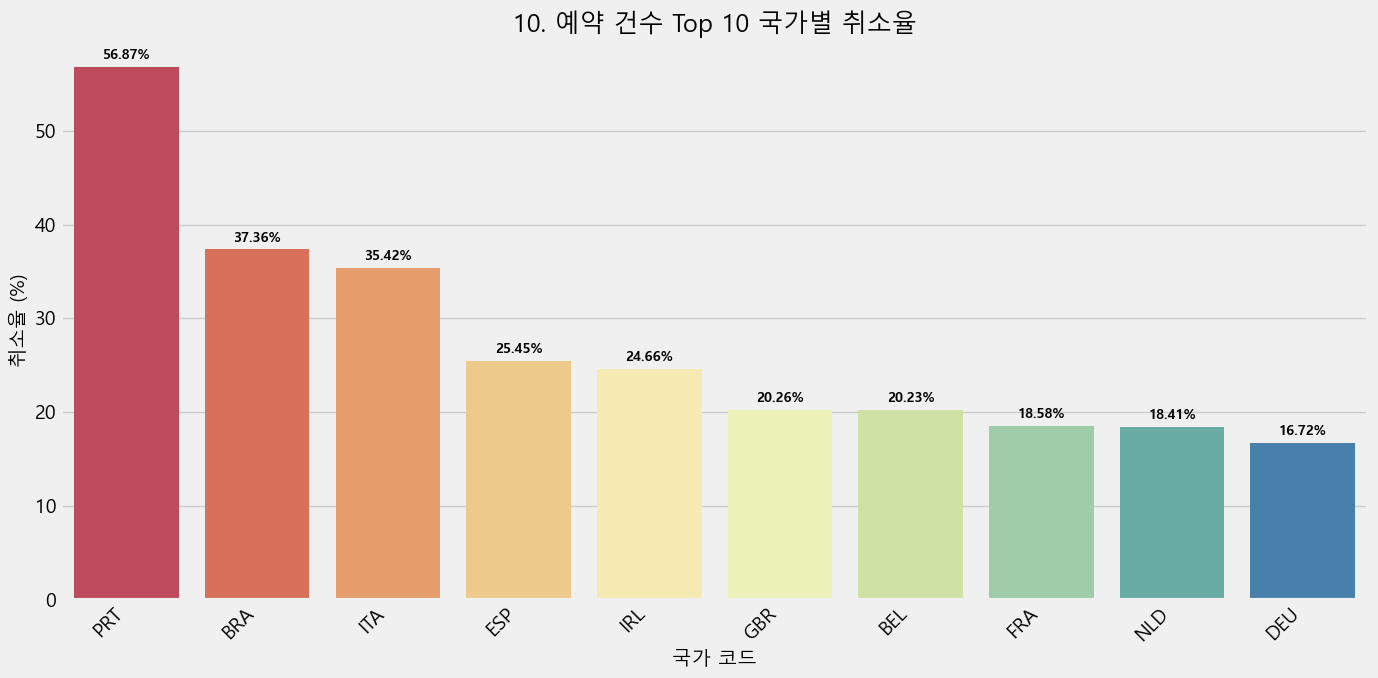

In [22]:
# 예약 건수 기준으로 상위 10개 국가 선정
country_counts = hotel_data['country'].value_counts()
top_10_countries = country_counts.head(10).index.tolist()

# 상위 10개 국가의 데이터만 필터링
data_top_10_countries = hotel_data[hotel_data['country'].isin(top_10_countries)]

# 국가별 취소율 계산 및 취소율 기준으로 정렬
country_cancel_rate = data_top_10_countries.groupby('country')['is_canceled'].mean().sort_values(ascending=False) * 100
country_order = country_cancel_rate.index.tolist()

plt.figure(figsize=(14, 7))
ax10 = sns.barplot(
    x = country_cancel_rate.index, 
    y=country_cancel_rate.values, 
    order=country_order, 
    palette='Spectral' # 다양한 색상 팔레트 사용
)
plt.title('10. 예약 건수 Top 10 국가별 취소율', fontsize=18)
plt.xlabel('국가 코드', fontsize=14)
plt.ylabel('취소율 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 각 막대 위에 값 표시
for p in ax10.patches:
    height = p.get_height()
    ax10.text(p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10, weight='bold')
plt.tight_layout()
plt.show()

#### 14) 총 숙박 일수별 취소율 
1. 1박,2박,3~7박,8~14박,15박 으로 나누어서 분석.

### 결론
1. City 호텔이 많은 취소율이 나옴. 특히 2박의 경우 짧은 기간임이도 많은 취소가 나옴.
2. resort 호텔은 3~7박이 취소가 많은 것이 특이한 점.
3. 15박 이상은 취소가 제일 큰데 이것은 긴 기간일 수록 많은 일정 변화로 인해서  취소가 많은 것으로 보임.

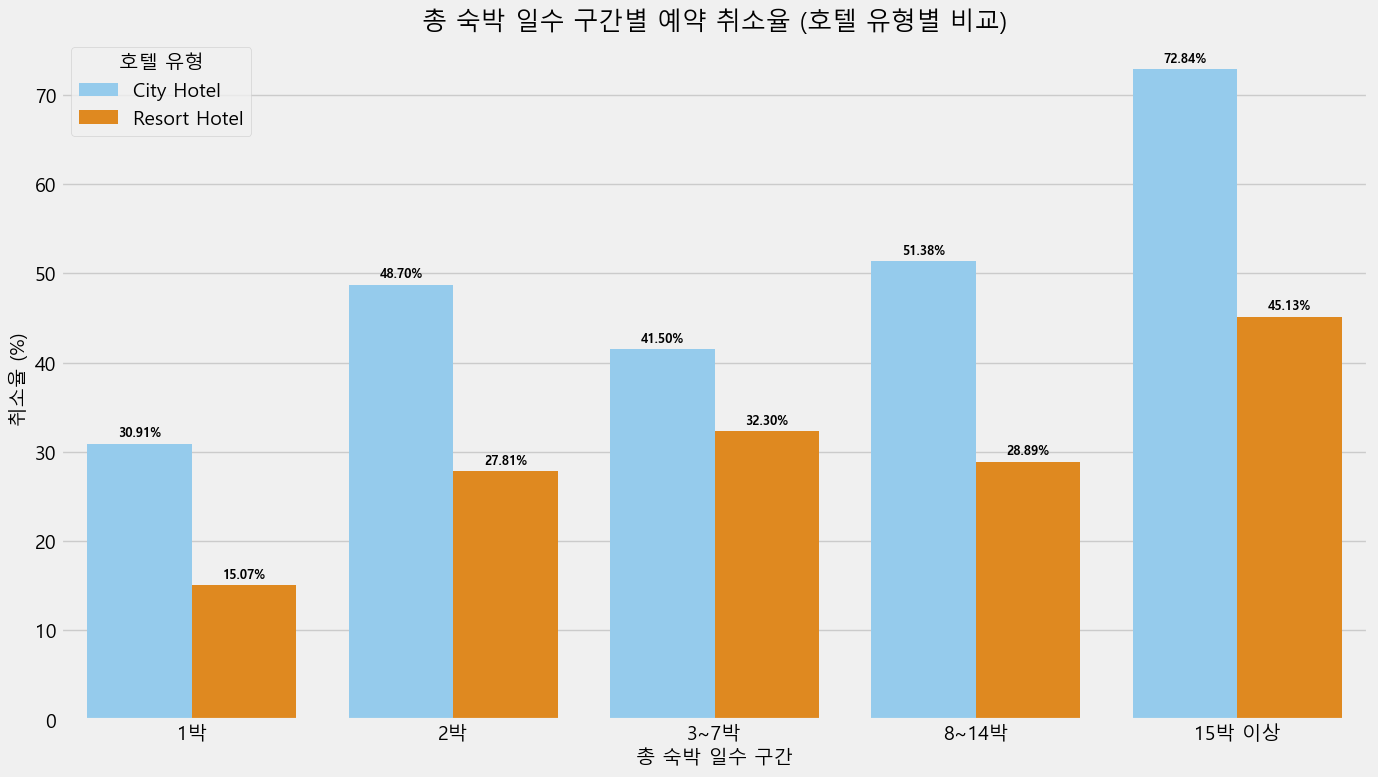

In [ ]:

# 총 숙박 일수 계산
hotel_data['total_stay_nights'] = hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights']

# 0박 숙박 데이터 제거 (0박은 투숙이 아니므로 분석에서 제외)
hotel_data.drop(hotel_data[hotel_data['total_stay_nights'] == 0].index, inplace=True)

# 숙박 일수를 범주형 구간으로 나누기
max_stay = hotel_data['total_stay_nights'].max()
# 1박, 2박, 3~7박 (단기), 8~14박 (중기), 15박 이상 (장기)
# [1, 2), [2, 3), [3, 8), [8, 15), [15, max_stay + 1) 형태로 구간을 정의하여,
# 각 구간의 시작점(a)을 포함하고 (right=False) 끝점(b)은 제외하도록 합니다.
bins = [1, 2, 3, 8, 15, max_stay + 1]
labels = ['1박', '2박', '3~7박', '8~14박', '15박 이상']

# right=False: [a, b) 형태로, 각 구간의 시작을 포함하고 끝은 제외합니다.
hotel_data['stay_length_group'] = pd.cut(hotel_data['total_stay_nights'], bins=bins, labels=labels, right=False, include_lowest=True)

# 숙박 일수 구간별 & 호텔 유형별 취소율 계산
cancel_rate_by_stay_hotel = hotel_data.groupby(['stay_length_group', 'hotel'], observed=False)['is_canceled'].mean().reset_index()
cancel_rate_by_stay_hotel['is_canceled'] = cancel_rate_by_stay_hotel['is_canceled'] * 100
cancel_rate_by_stay_hotel.rename(columns={'is_canceled': '취소율 (%)'}, inplace=True)

# 시각화 (Grouped Bar Plot)
plt.figure(figsize=(14, 8))
ax11 = sns.barplot(
	data=cancel_rate_by_stay_hotel,
	x='stay_length_group',
	y='취소율 (%)',
	hue='hotel', 
	palette= hotel_colors
)
plt.title('총 숙박 일수 구간별 예약 취소율 (호텔 유형별 비교)', fontsize=18)
plt.xlabel('총 숙박 일수 구간', fontsize=14)
plt.ylabel('취소율 (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='호텔 유형')

# 막대 높이에 따라 텍스트 위치를 조정하는 복잡한 로직 제거
for p in ax11.patches:
	height = p.get_height()
	# 막대 위에 텍스트 고정 (모든 레이블은 막대 위에 표시)
	y_position = height + 0.5 
	va_align = 'bottom' 	
	color_text = '#000000'
	# x 좌표와 y 좌표 조정하여 텍스트 위치 설정
	if height != 0 :
		ax11.text(p.get_x() + p.get_width() / 2.,
				y_position,
				f'{height:.2f}%',
				ha='center', va=va_align, fontsize=9, weight='bold', color=color_text)

#plt.ylim(ymin=-1, ymax=ax11.get_ylim()[1])
plt.tight_layout()
plt.show()


#### 15) 채널 별 예약수 
1. 각 채널별 예약수로 표시

### 결론
1. TA/TO 채널이 압도적으로 많음.
2. 다른 채널에 대한 마케팅이 필요.

C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\2132601863.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  channel_count = hotel_data.groupby('distribution_channel').apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()


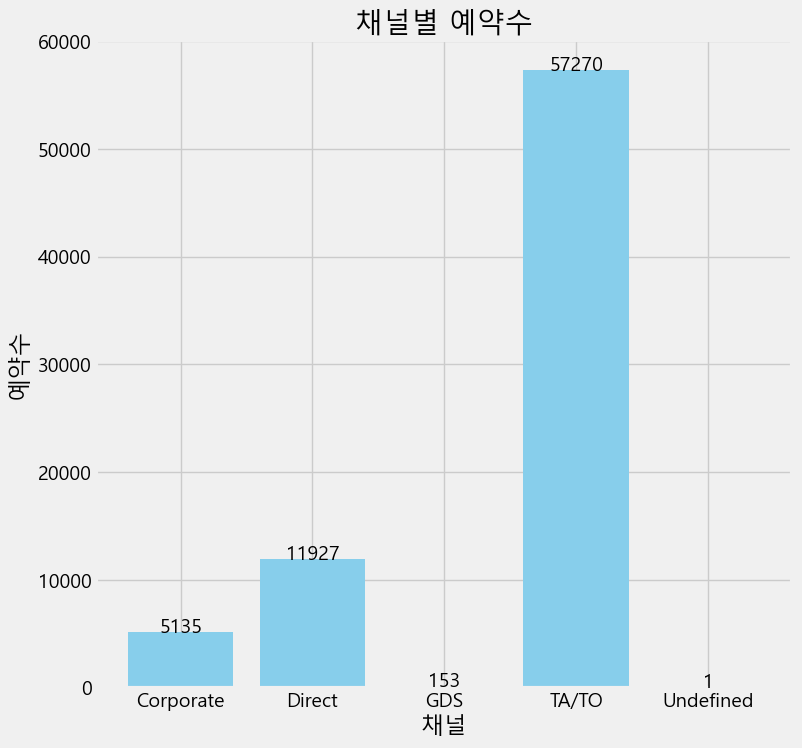

In [48]:

channel_count = hotel_data.groupby('distribution_channel').apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()
channel_count.columns = ['channel','count']
plt.bar(channel_count['channel'],channel_count['count'],color='skyblue')

# channel과 count 열을 순회합니다.
for i, count in enumerate(channel_count['count']):
    # plt.text(x_좌표, y_좌표, 표시할 텍스트, 정렬)
    # x_좌표: i (enumerate의 인덱스, 막대의 위치에 해당)
    # y_좌표: count (막대의 높이, 숫자 텍스트를 막대 상단에 위치시키기 위해 약간의 여백을 줍니다)
    # 텍스트: count 값을 문자열로 변환
    plt.text(
        x=i, 
        y=count + 0.1,  # 막대 상단에서 0.1만큼 위에 위치
        s=str(count), 
        ha='center'     # Horizontal Alignment: 텍스트를 x_좌표 중앙에 정렬
    )

# 3. 그래프 제목 및 축 레이블 설정
plt.title('채널별 예약수')
plt.xlabel('채널')
plt.ylabel('예약수')

# 4. 그래프 출력
plt.show()


#### 16) 세드먼트별  
1. 각 세그먼트별 예약수로 표시

### 결론
1. Online TA 세그먼트가 압도적으로 많음.


C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\1652270568.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  channel_count = hotel_data.groupby('market_segment').apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()


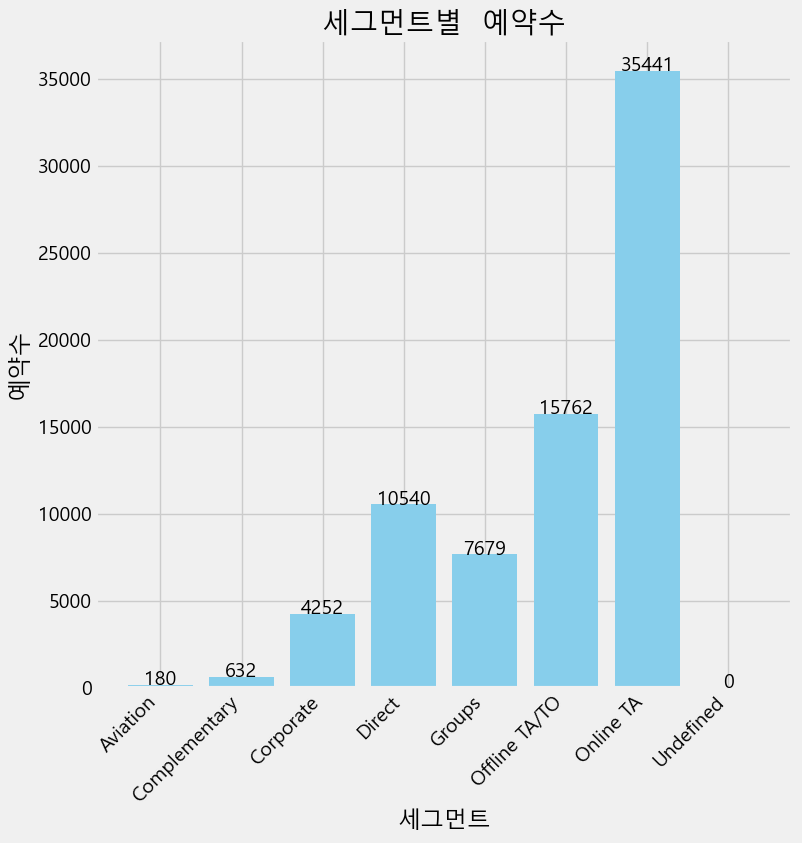

In [54]:
channel_count = hotel_data.groupby('market_segment').apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()
channel_count.columns = ['segment','count']
plt.bar(channel_count['segment'],channel_count['count'],color='skyblue')

# channel과 count 열을 순회합니다.
for i, count in enumerate(channel_count['count']):
    # plt.text(x_좌표, y_좌표, 표시할 텍스트, 정렬)
    # x_좌표: i (enumerate의 인덱스, 막대의 위치에 해당)
    # y_좌표: count (막대의 높이, 숫자 텍스트를 막대 상단에 위치시키기 위해 약간의 여백을 줍니다)
    # 텍스트: count 값을 문자열로 변환
    plt.text(
        x=i, 
        y=count + 0.1,  # 막대 상단에서 0.1만큼 위에 위치
        s=str(count), 
        ha='center'     # Horizontal Alignment: 텍스트를 x_좌표 중앙에 정렬
    )

# 3. 그래프 제목 및 축 레이블 설정
plt.title('세그먼트별  예약수')
plt.xlabel('세그먼트')
plt.ylabel('예약수')
plt.xticks(rotation=45, ha='right')
# 4. 그래프 출력
plt.show()


#### 17) 채널/세그먼트별 예약  
1. 각 채널/세그먼트별 표시

### 결론
1. Online TA 세그먼트가 압도적으로 많음.

C:\Users\nabid\AppData\Local\Temp\ipykernel_22036\2231957197.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  channel_count = hotel_data.groupby(['distribution_channel','market_segment']).apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()


   distribution_channel market_segment  count
0             Corporate       Aviation    171
1             Corporate  Complementary     69
2             Corporate      Corporate   3861
3             Corporate         Direct     79
4             Corporate         Groups    818
5             Corporate  Offline TA/TO    108
6             Corporate      Online TA     29
7                Direct  Complementary    492
8                Direct      Corporate    152
9                Direct         Direct  10233
10               Direct         Groups    915
11               Direct  Offline TA/TO     13
12               Direct      Online TA    122
13                  GDS         Direct      1
14                  GDS  Offline TA/TO     37
15                  GDS      Online TA    115
16                TA/TO       Aviation      9
17                TA/TO  Complementary     71
18                TA/TO      Corporate    239
19                TA/TO         Direct    226
20                TA/TO         Gr

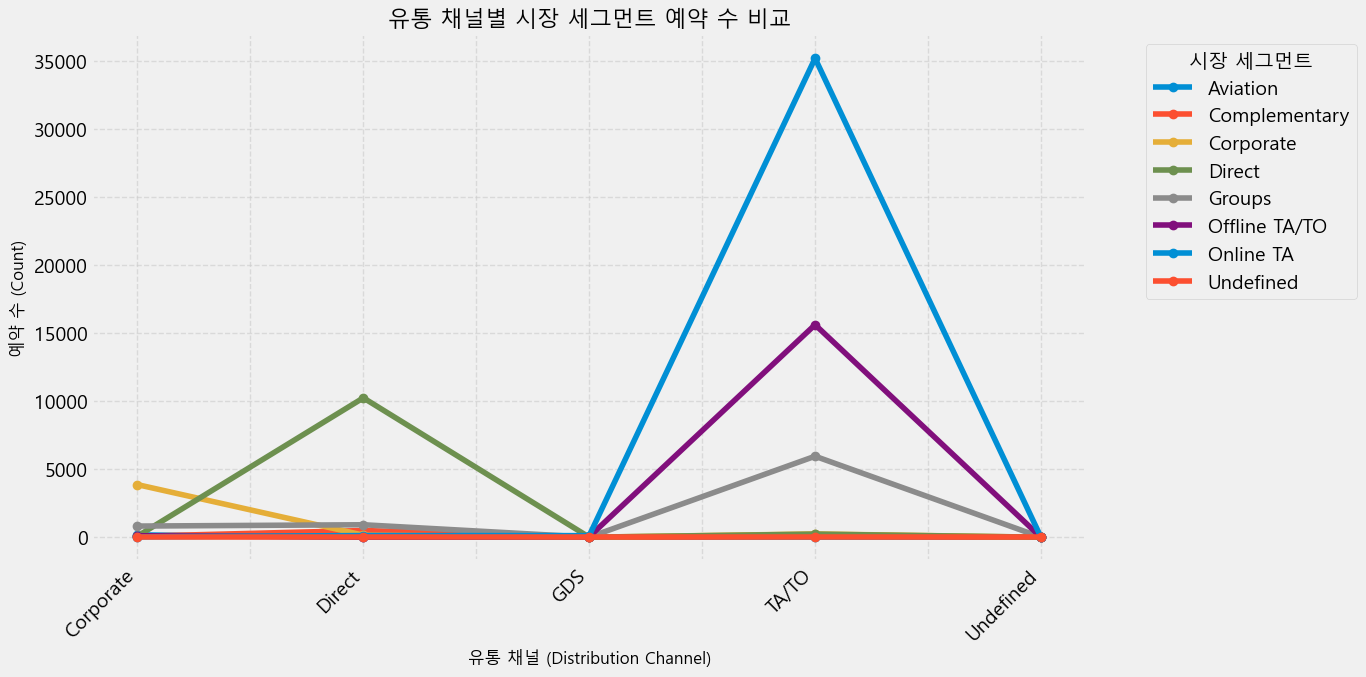

In [57]:
channel_count = hotel_data.groupby(['distribution_channel','market_segment']).apply(lambda x: (x['is_canceled'] == 0).sum()).reset_index()
channel_count.columns = ['distribution_channel','market_segment','count']
print(channel_count)
pivot_df = channel_count.pivot_table(index='distribution_channel', 
                                     columns='market_segment', 
                                     values='count', 
                                     fill_value=0)

# 2. 라인 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 7))

# Pandas DataFrame의 plot 기능을 사용하여 라인 그래프를 그립니다.
# x축: distribution_channel (인덱스), 라인: market_segment (열)
pivot_df.plot(kind='line', marker='o', ax=ax) 

# 3. 그래프 설정
plt.title('유통 채널별 시장 세그먼트 예약 수 비교', fontsize=16)
plt.xlabel('유통 채널 (Distribution Channel)', fontsize=12)
plt.ylabel('예약 수 (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='시장 세그먼트', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


## 분석
1. 예약 취소율: 전체 예약 중 약 37% 정도가 취소되었음을 확인 (119390건 중 약 44224건).
2. 호텔 유형: City Hotel의 예약 건수 (약 79000)가 Resort Hotel (약 40000)보다 두 배 가까이 많음.
3. 호텔 유형별 취소율: City Hotel의 취소율 (약 41.7%)이 Resort Hotel의 취소율 (약 27.7%)보다 상당히 높음.
    이는 City Hotel의 예약 취소 문제에 더 집중해야 함을 시사함.
4. Resort Hotel이 City Hotel 보다 가족단위의 여행객이 많은 것으로 이해됨.(유아 동반)
5. 대부분 유럽국가(90%)이상으로 되어 있으며, 특히 상위 5개국에 집중.
   이는 다른 대륙이나 혹은 유럽 내에서도 마케팅 다변화 필요.
   
